# 03wk-1: `mpg` data, 아이스크림을 많이 먹으면 걸리는 병

최규빈  
2023-09-18

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/03wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-z-WJQdo9LACRZw0Lc2alqm&si=KeI8SchuDRPsRfgw>

# 2. Imports

In [2]:
# !pip install plotnine -- 설치해야해요~

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from plotnine import * 

In [2]:
import plotnine

In [3]:
plotnine.options.dpi= 150
plotnine.options.figure_size = (6, 5) 

# 3. `mpg` data

## A. read data

`-` ref: <https://r4ds.had.co.nz/index.html>

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/mpg.csv')
df

## B. descriptions

`-` 컬럼들의 이름을 출력.

In [6]:
df.columns

`-` ChatGPT에 문의

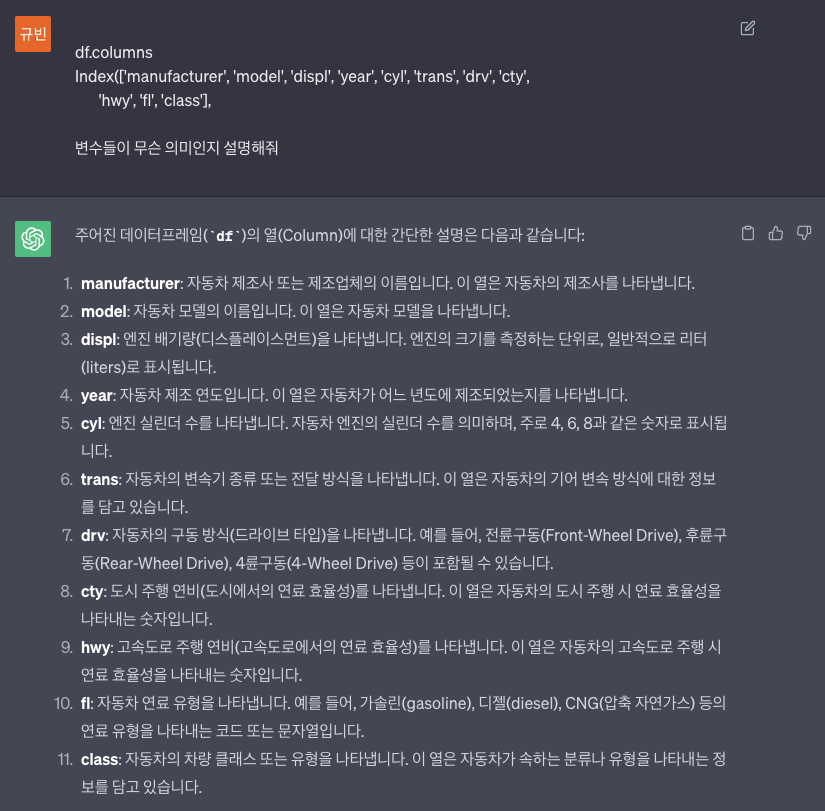

# 4. `mpg`의 시각화: 2차원

## A. `x=displ`, `y=hwy`

`-` 예시1: 정직하게 매뉴얼대로..

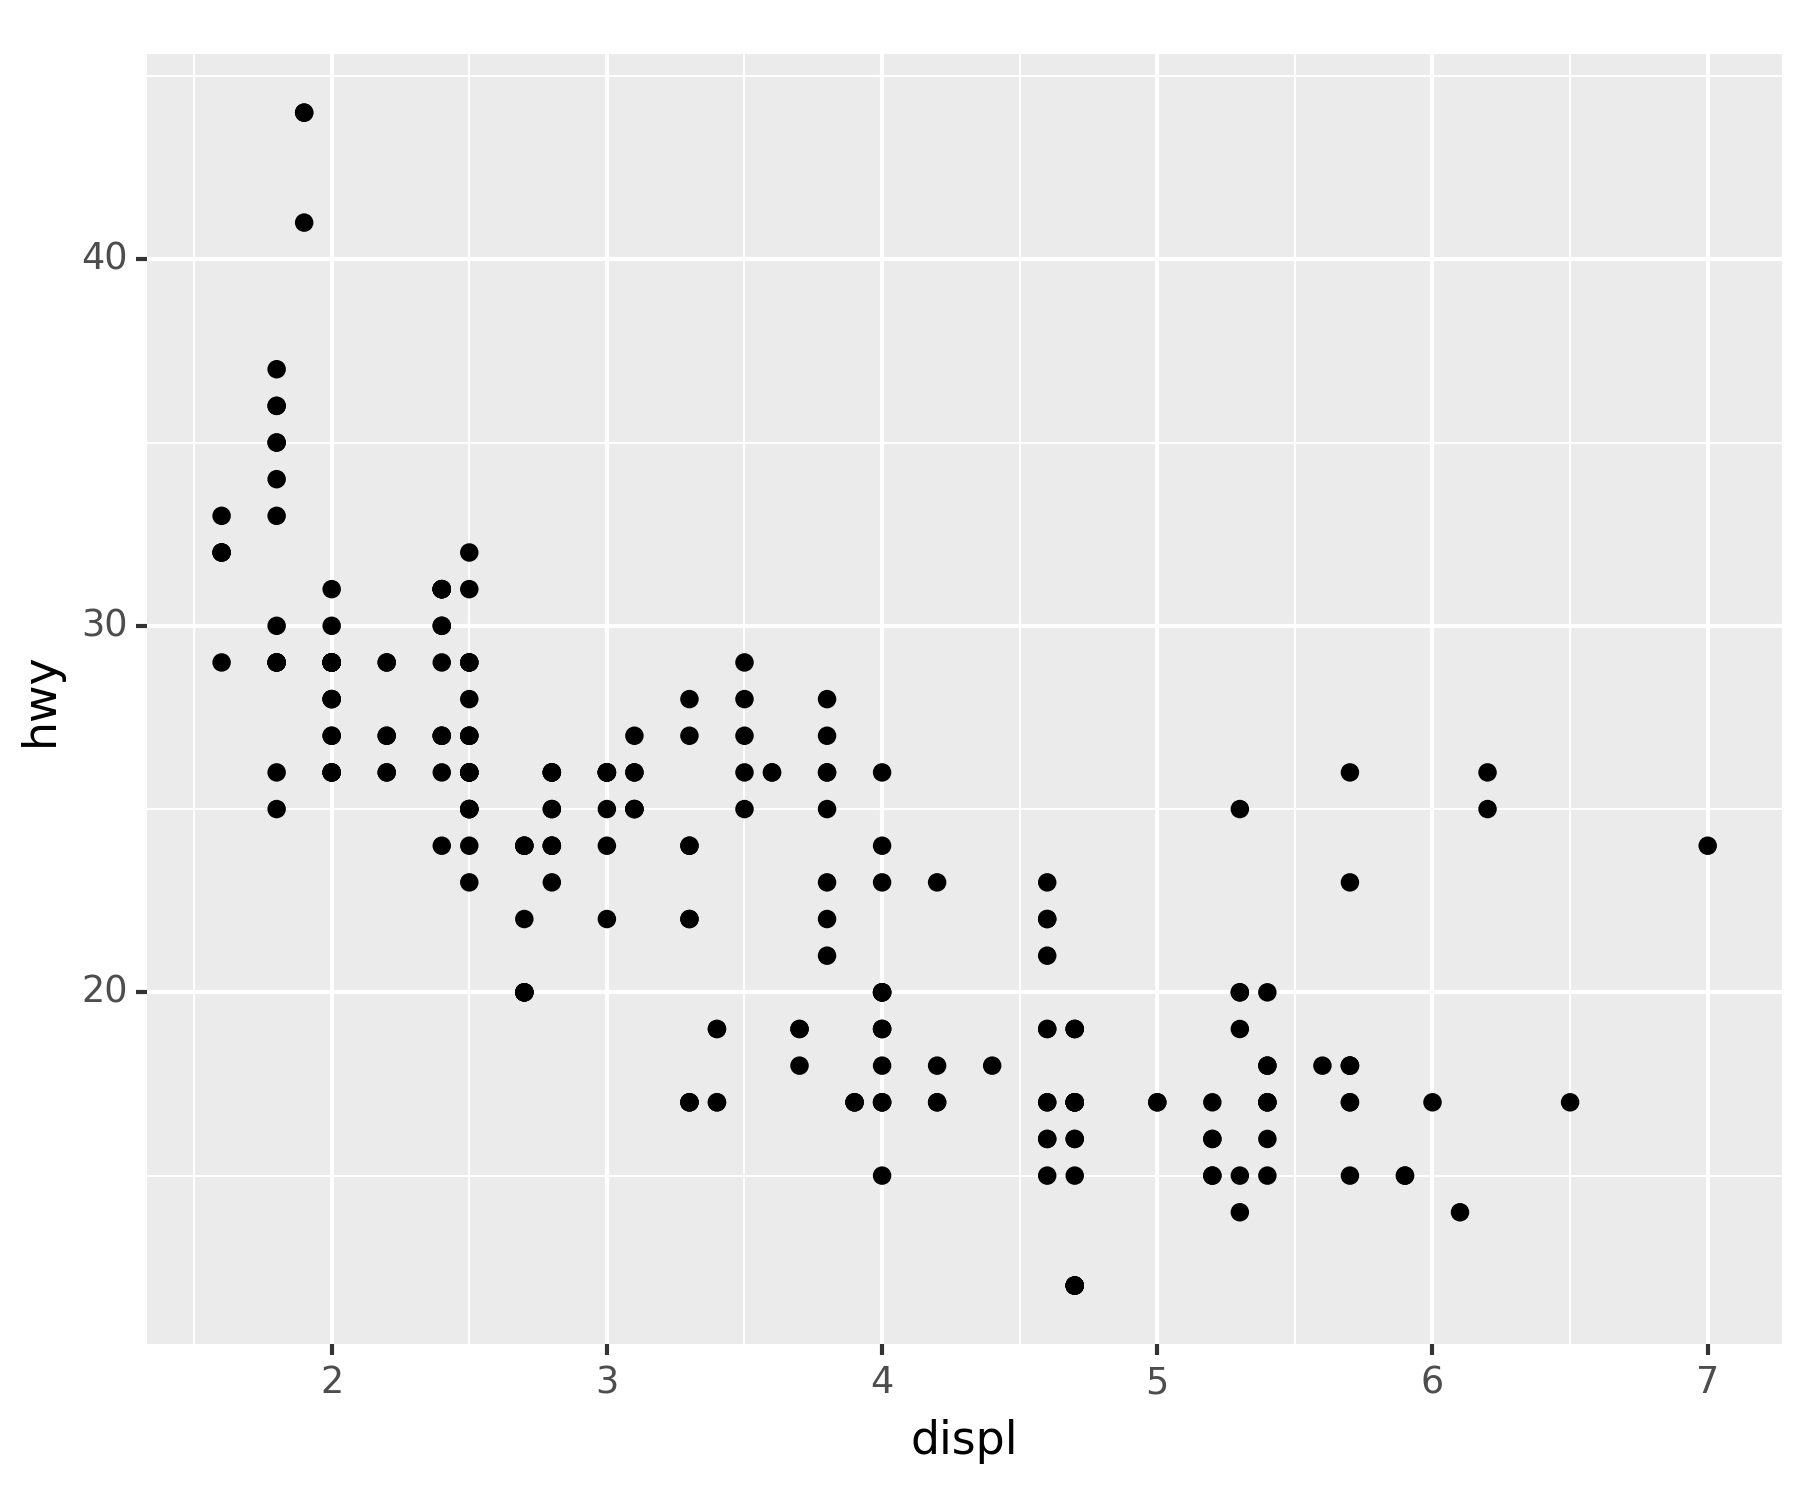

In [7]:
ggplot(data=df) + geom_point(mapping=aes(x='displ',y='hwy'))

`-` 예시2: `data=`와 `mapping=`은 생략가능하다.

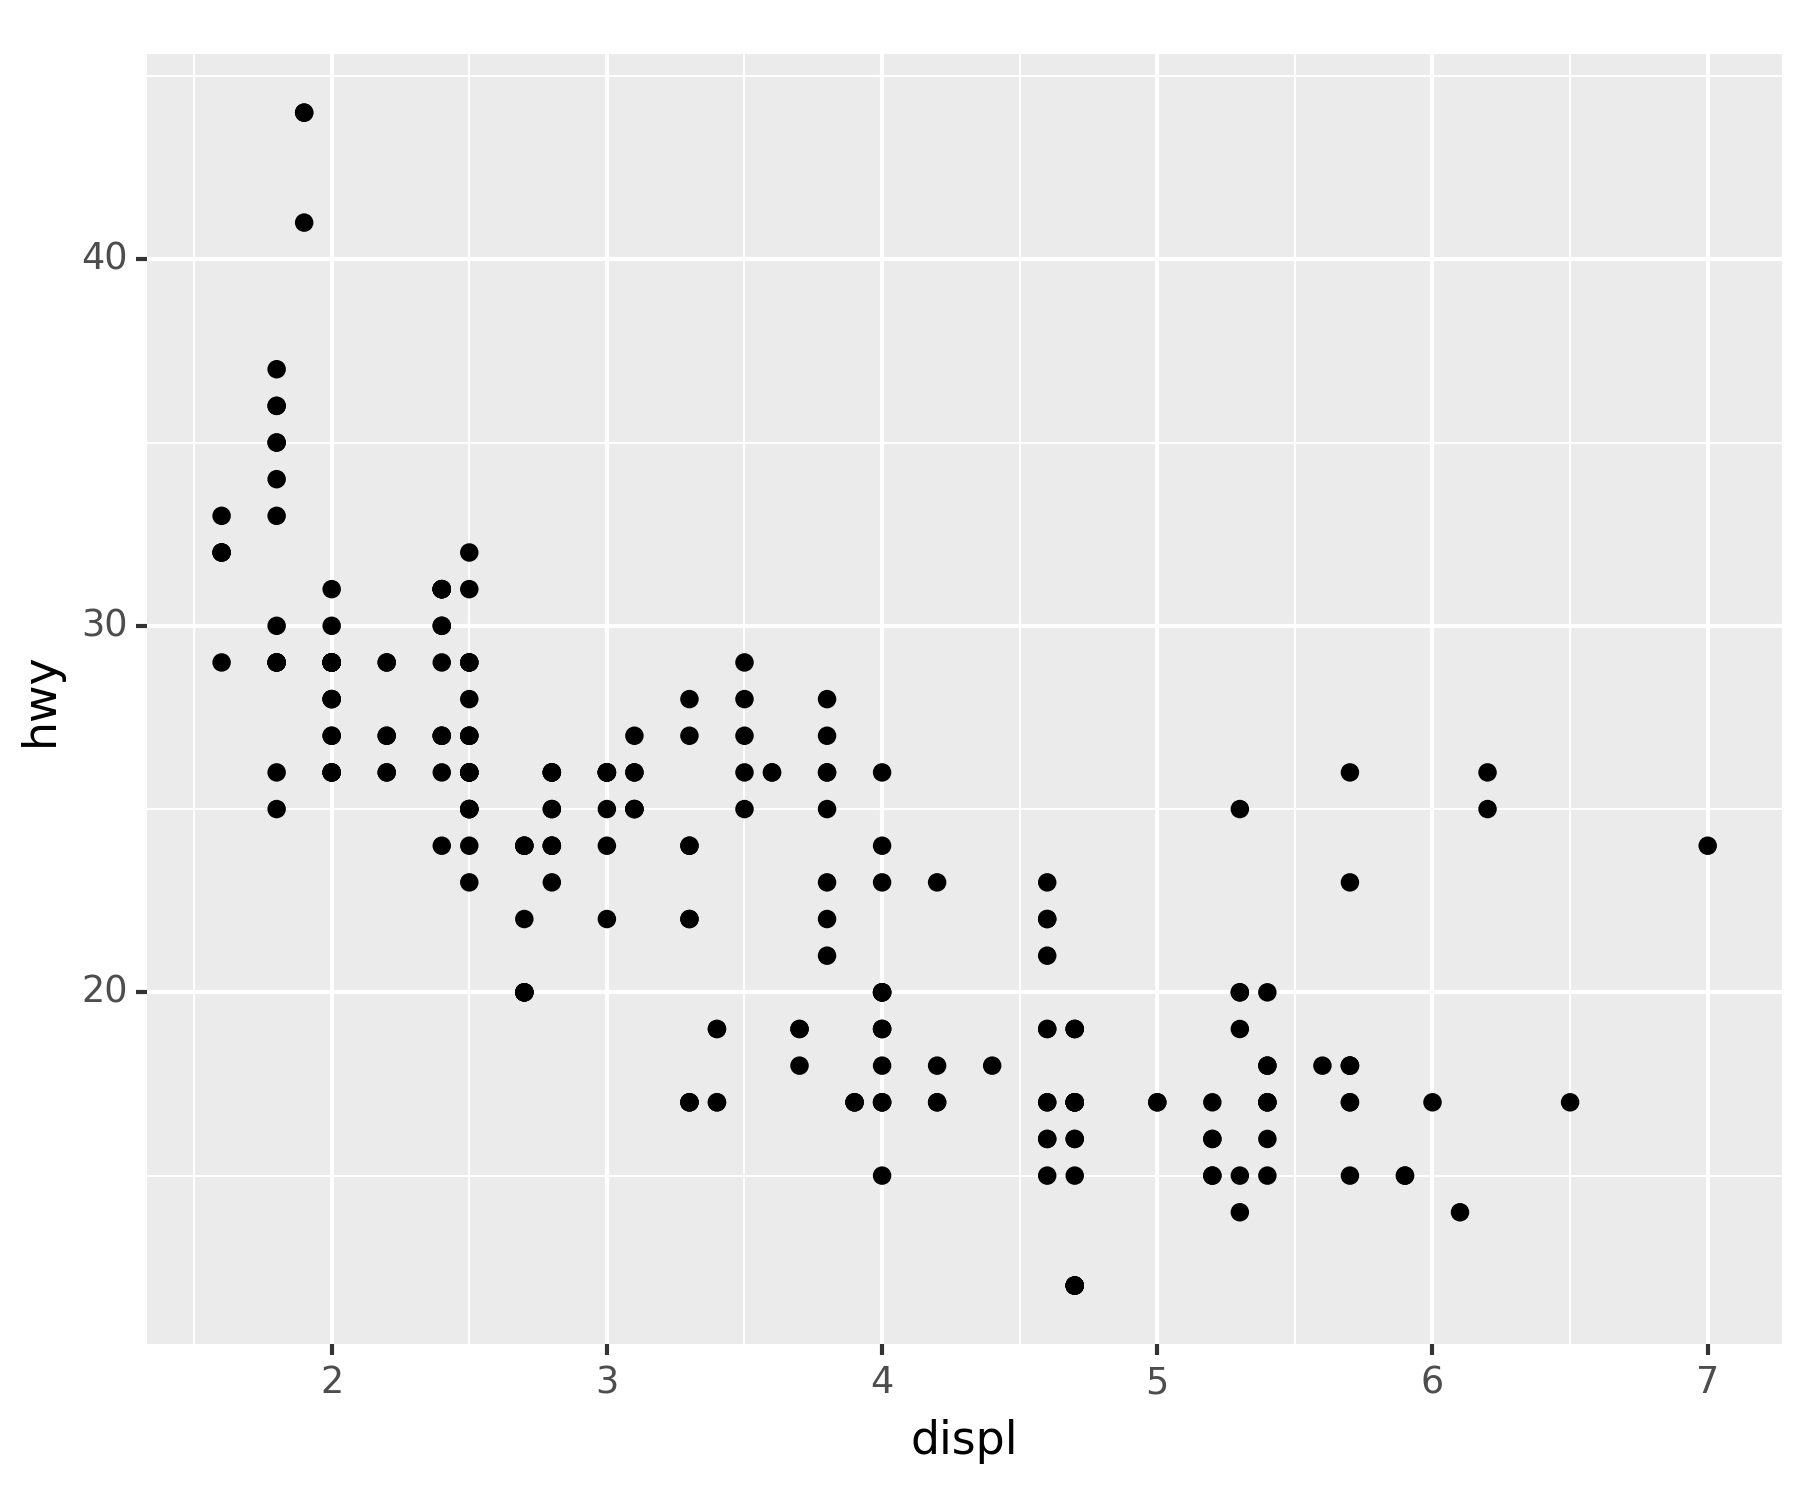

In [8]:
ggplot(df)+geom_point(aes(x='displ',y='hwy'))

## B. `rpy2` – 코랩 아닌 경우 실습금지

`-` 예시: R에서도 거의 똑같은 문법으로 그릴수 있음 (1타2피..)

In [9]:
import rpy2
%load_ext rpy2.ipython

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

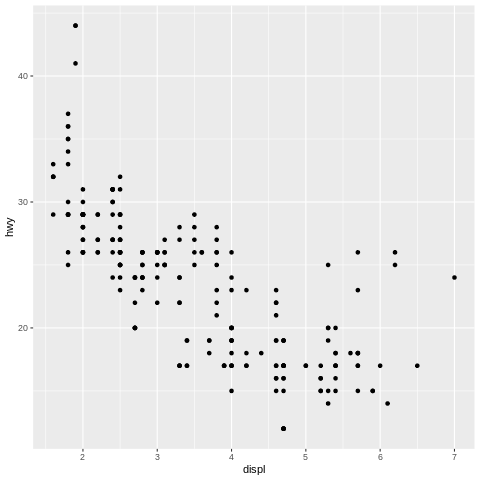

In [71]:
%%R
library(tidyverse)
df = mpg
ggplot(df)+geom_point(aes(x=displ,y=hwy))

# 5. `mpg`의 시각화: 3차원

## A. `x=displ`, `y=hwy`, `shape=class`

`-` 예시1

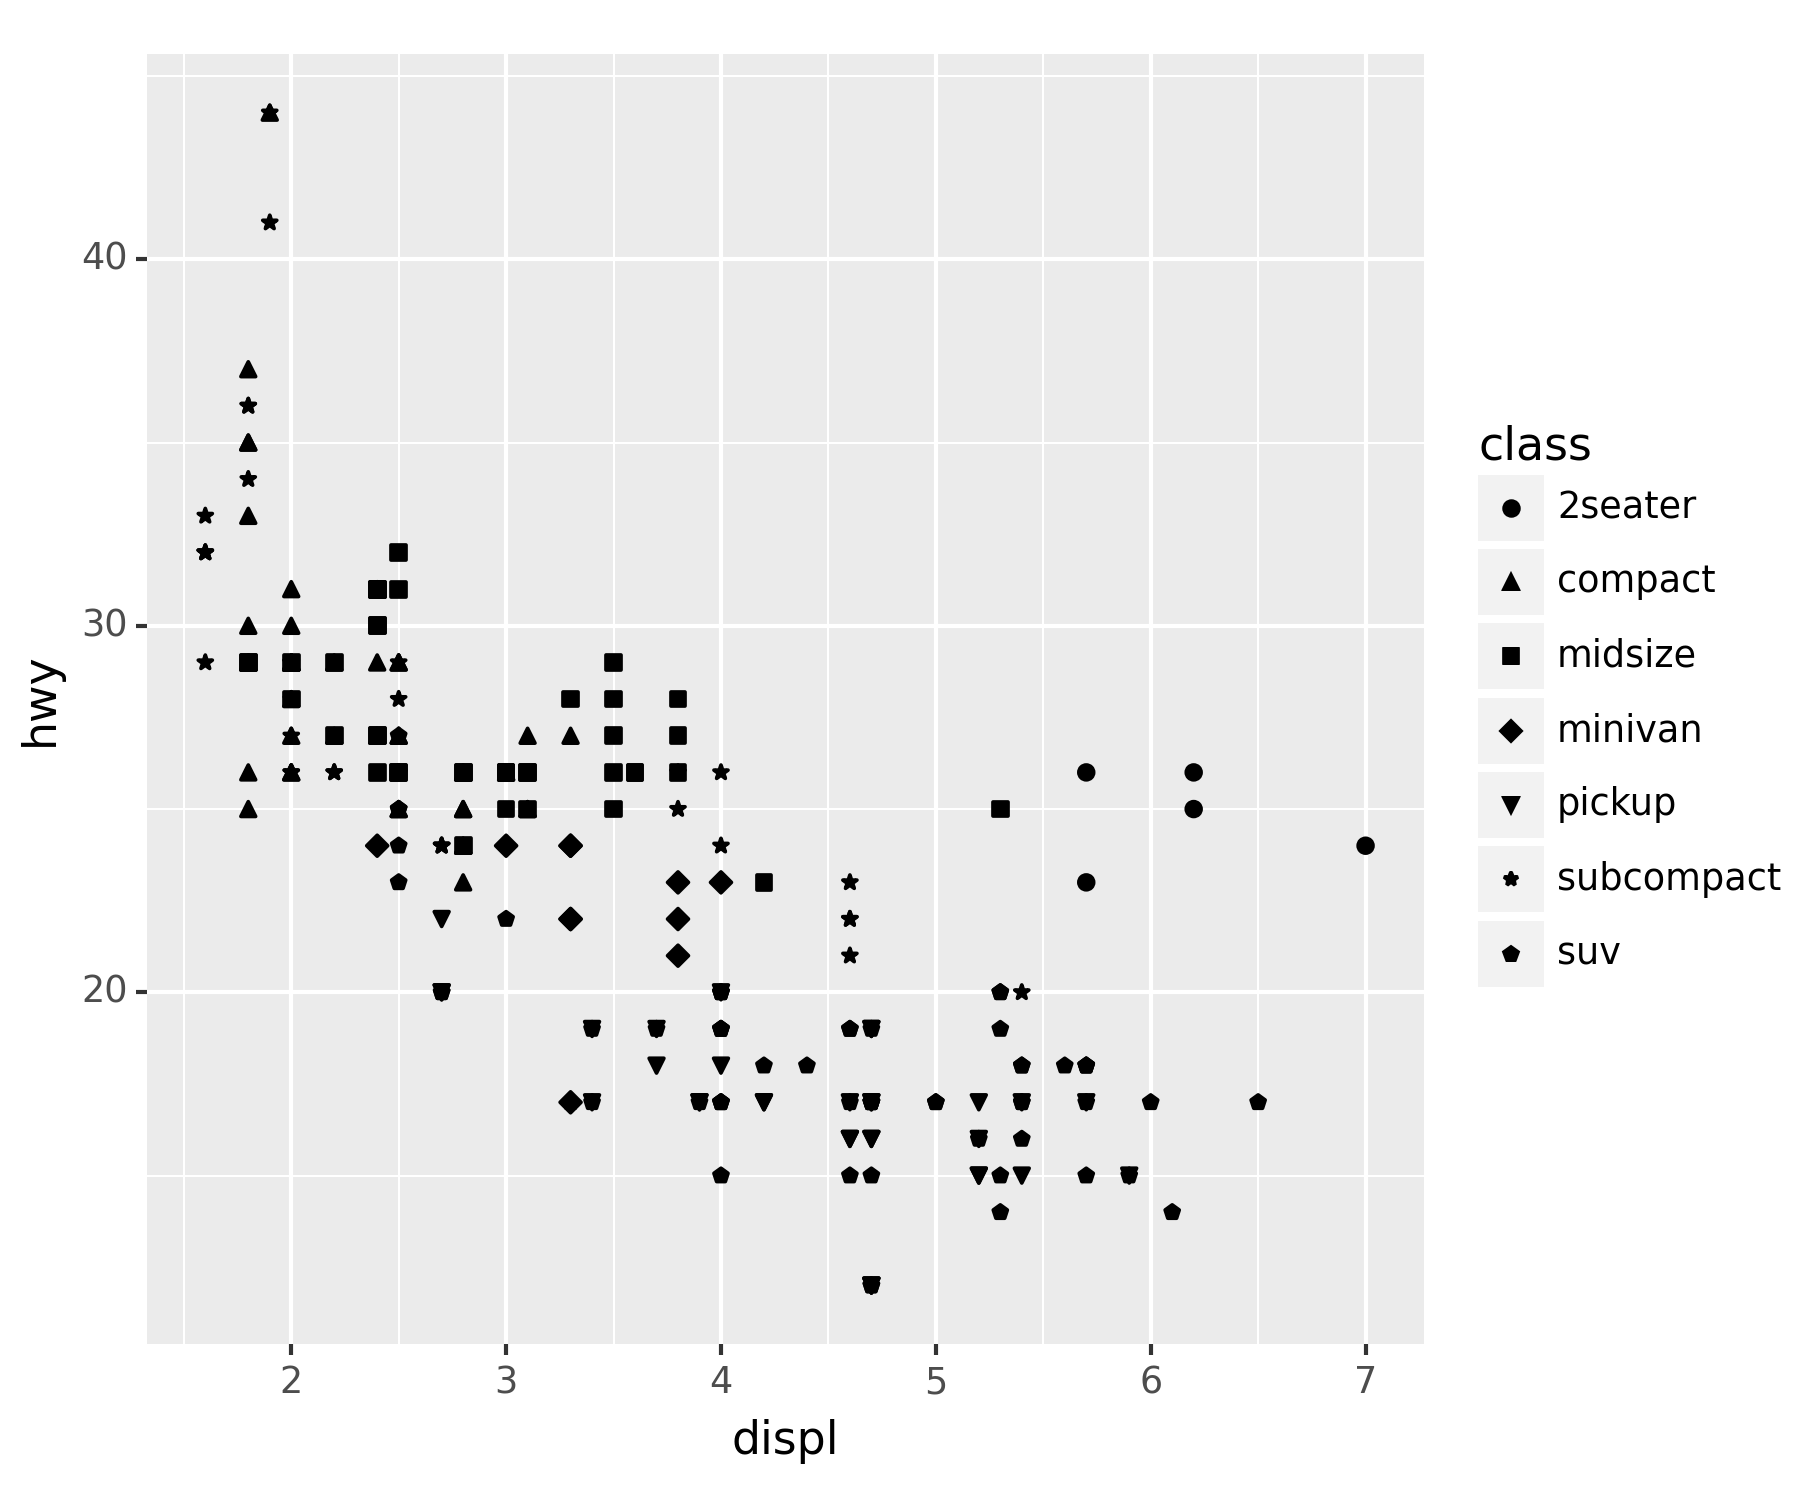

In [11]:
ggplot(df) + geom_point(aes(x='displ',y='hwy',shape='class'))

## B. `x=displ`, `y=hwy`, `color=class`

`-` 예시1

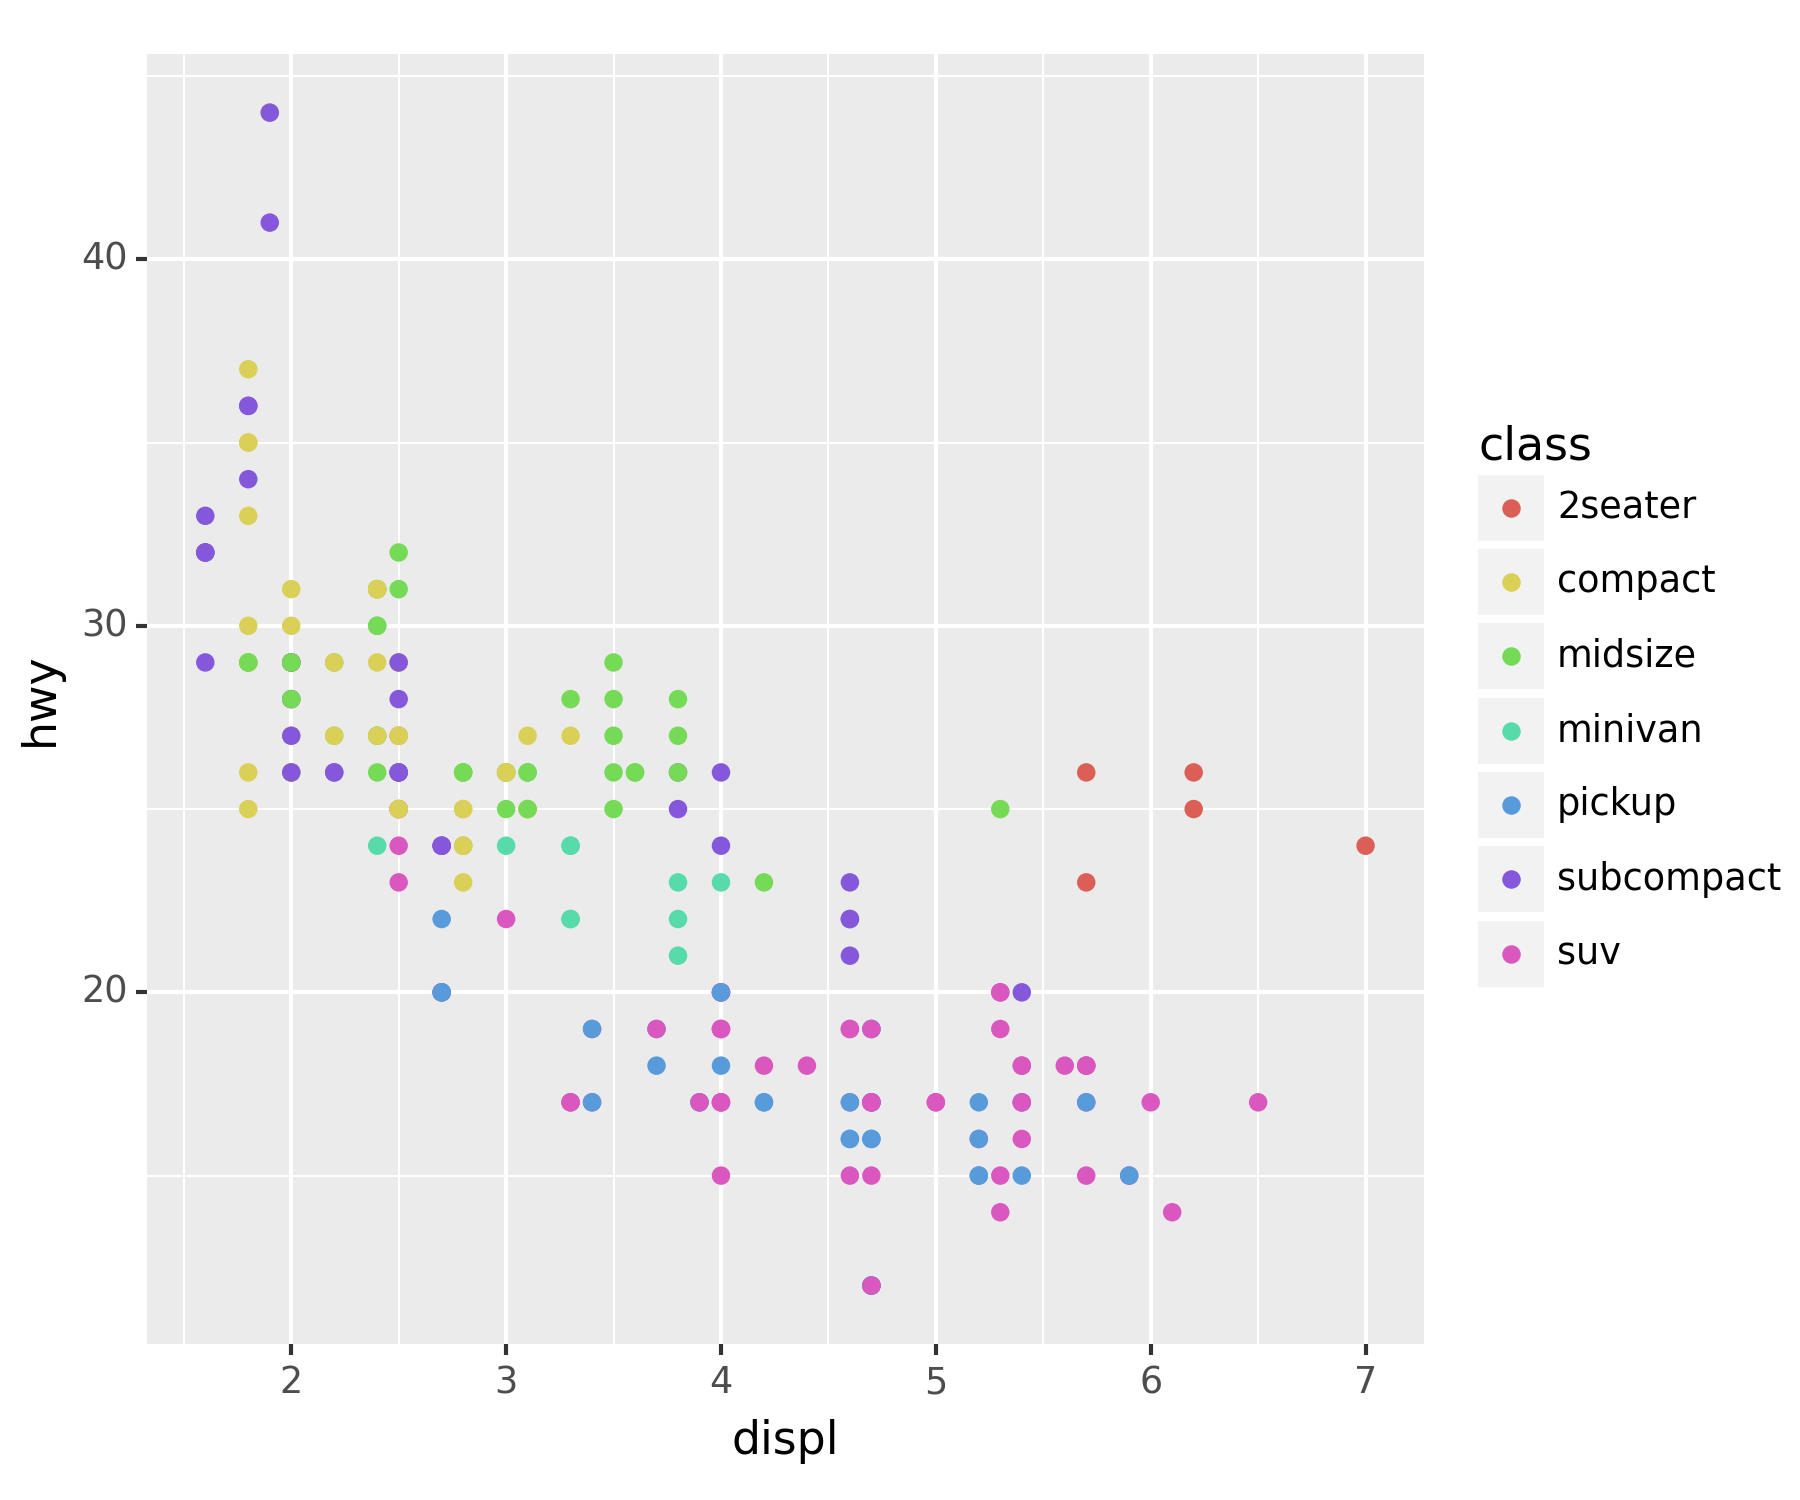

In [12]:
ggplot(df) + geom_point(aes(x='displ',y='hwy',color='class'))

## C. `x=displ`, `y=hwy`, `color=class`, `shape=class`

`-` 예시1

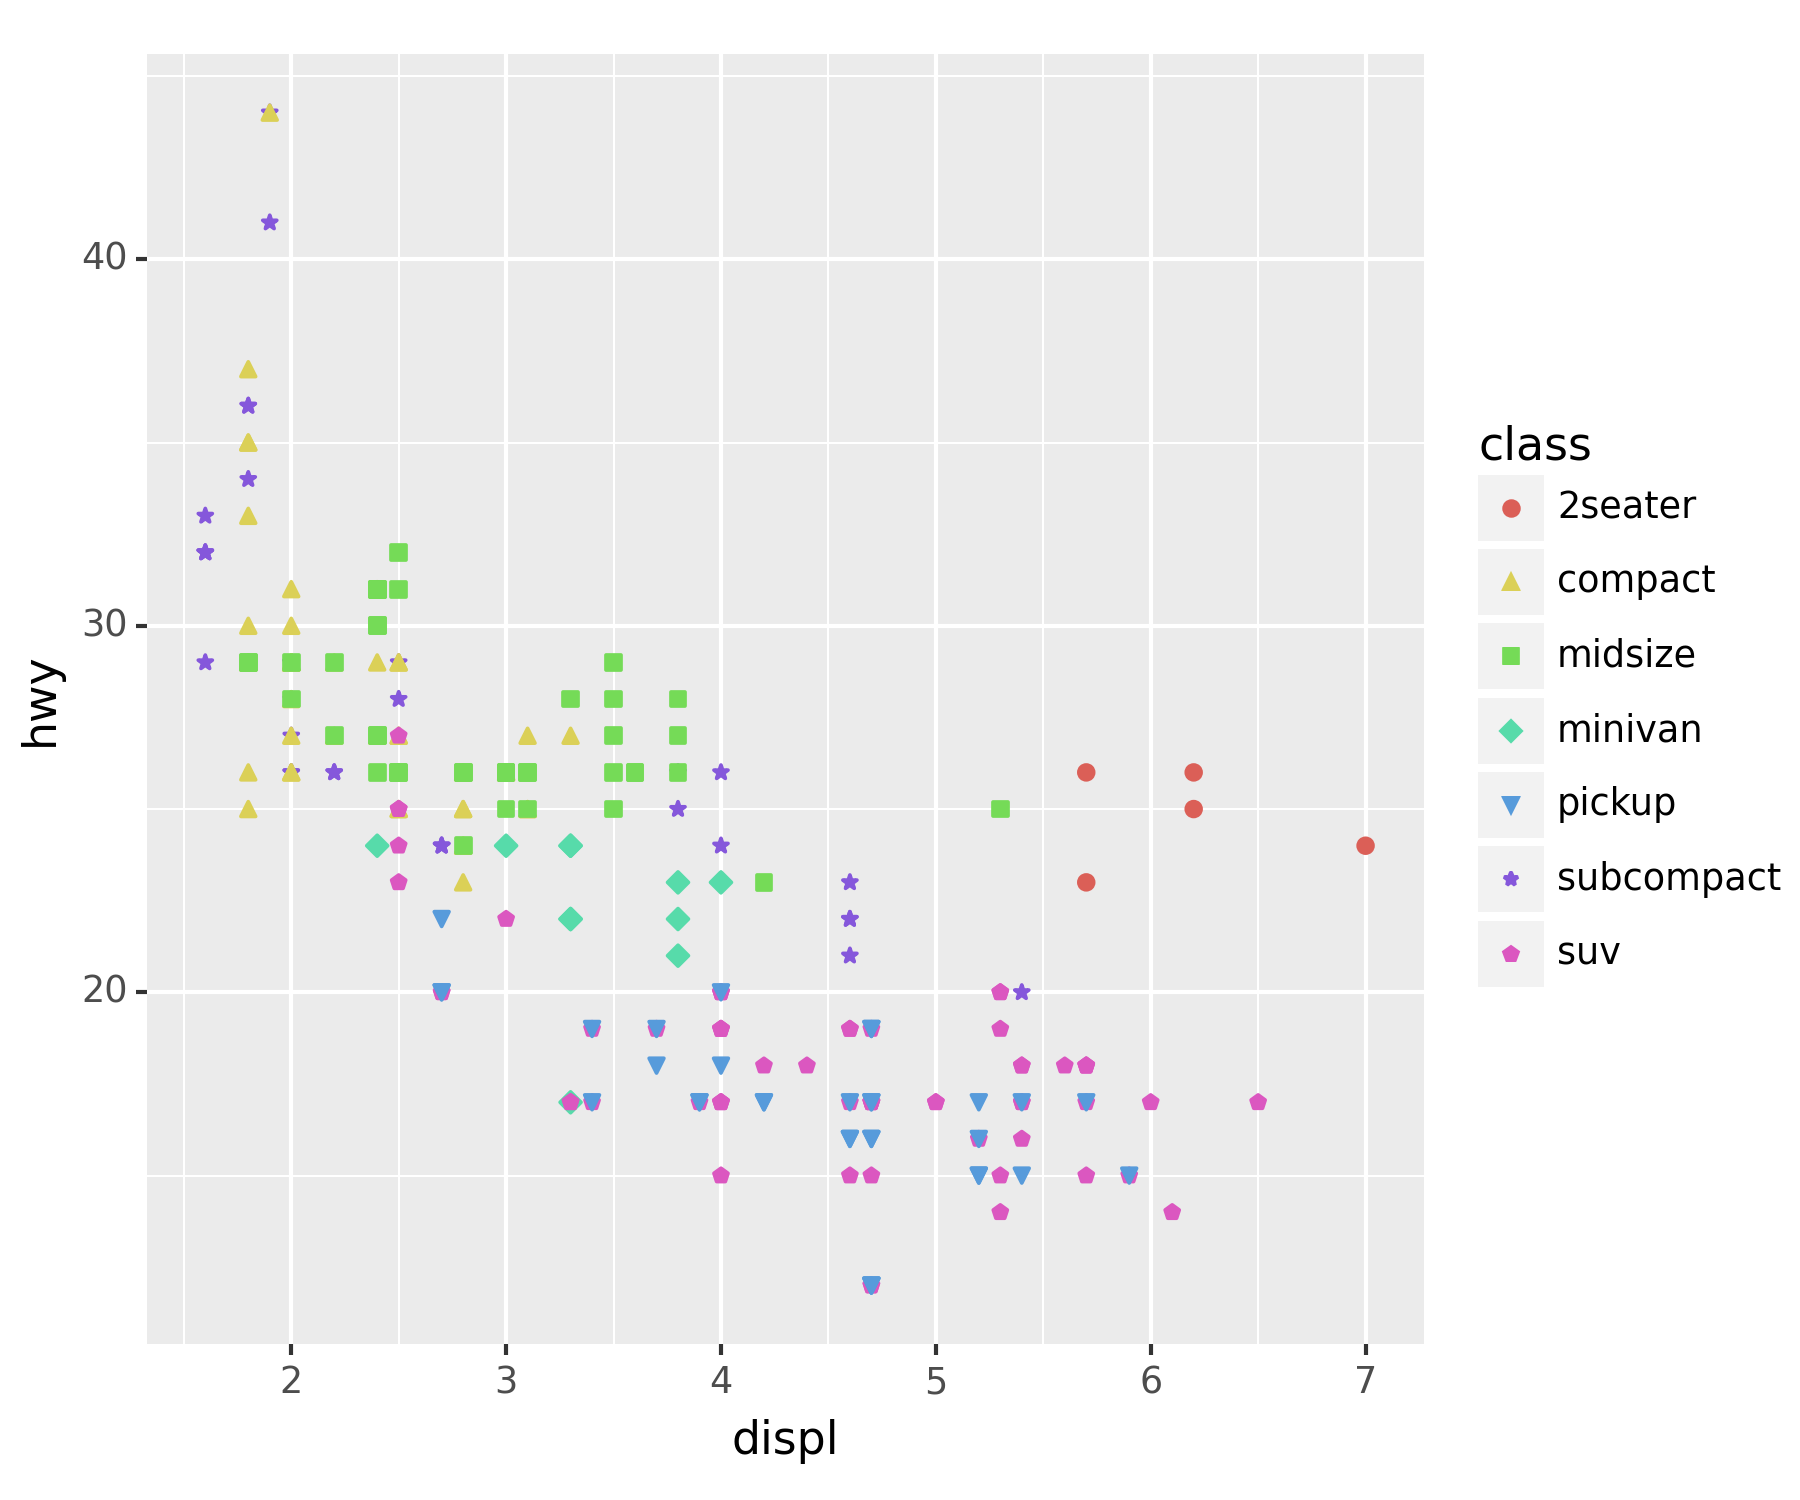

In [13]:
ggplot(df) + geom_point(aes(x='displ',y='hwy',color='class',shape='class'))

`-` 예시2: 전체적으로 size를 크게..

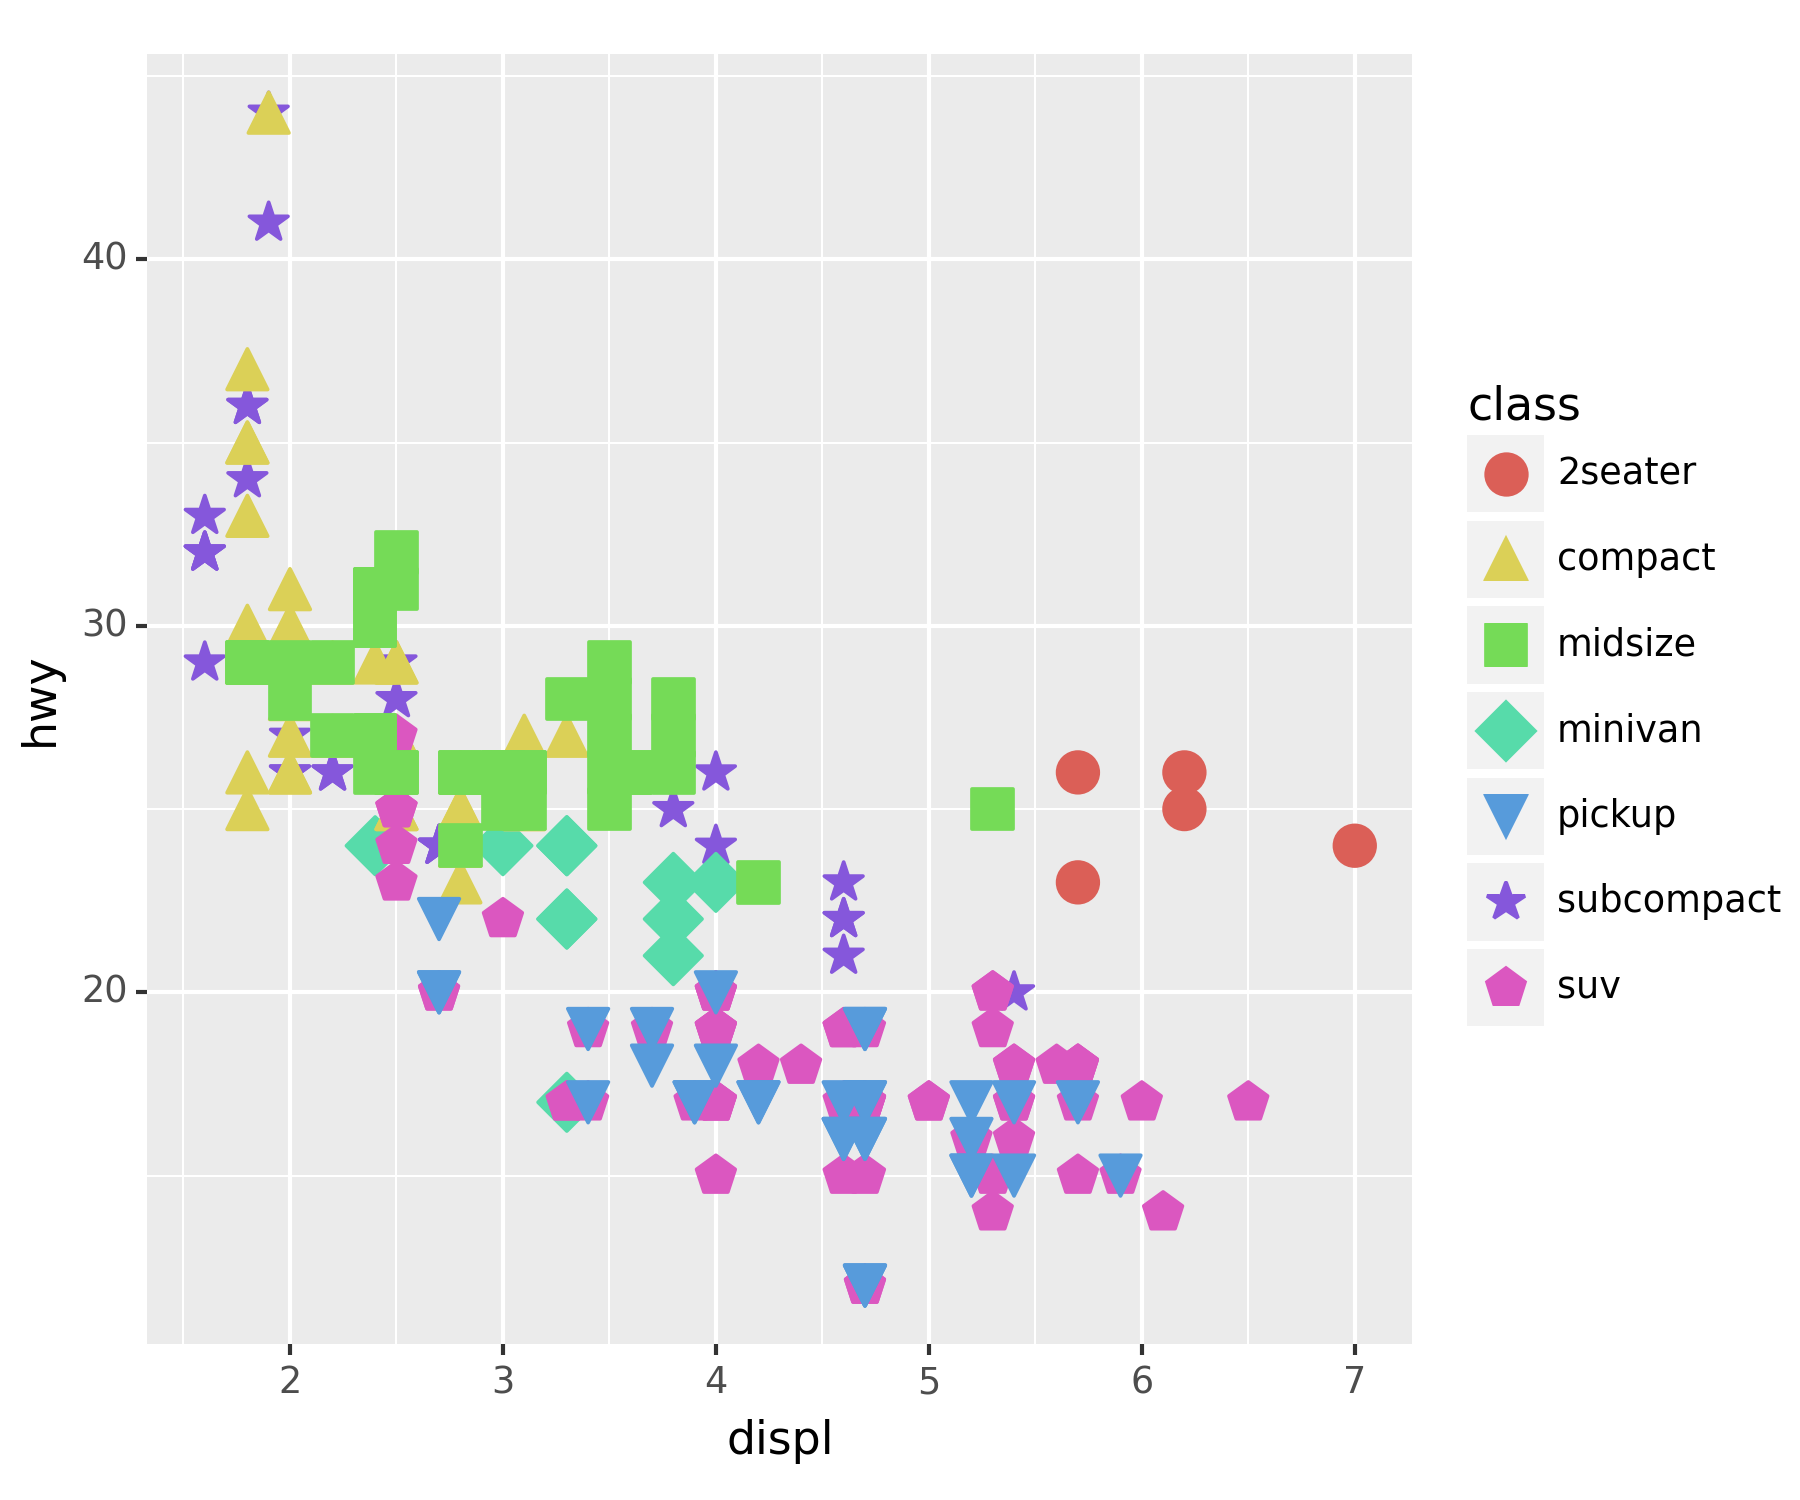

In [14]:
ggplot(df) + geom_point(aes(x='displ',y='hwy',color='class',shape='class'),size=5)

`-` 예시3: 겹치는 부분이 있으니 좀 더 투명하게..

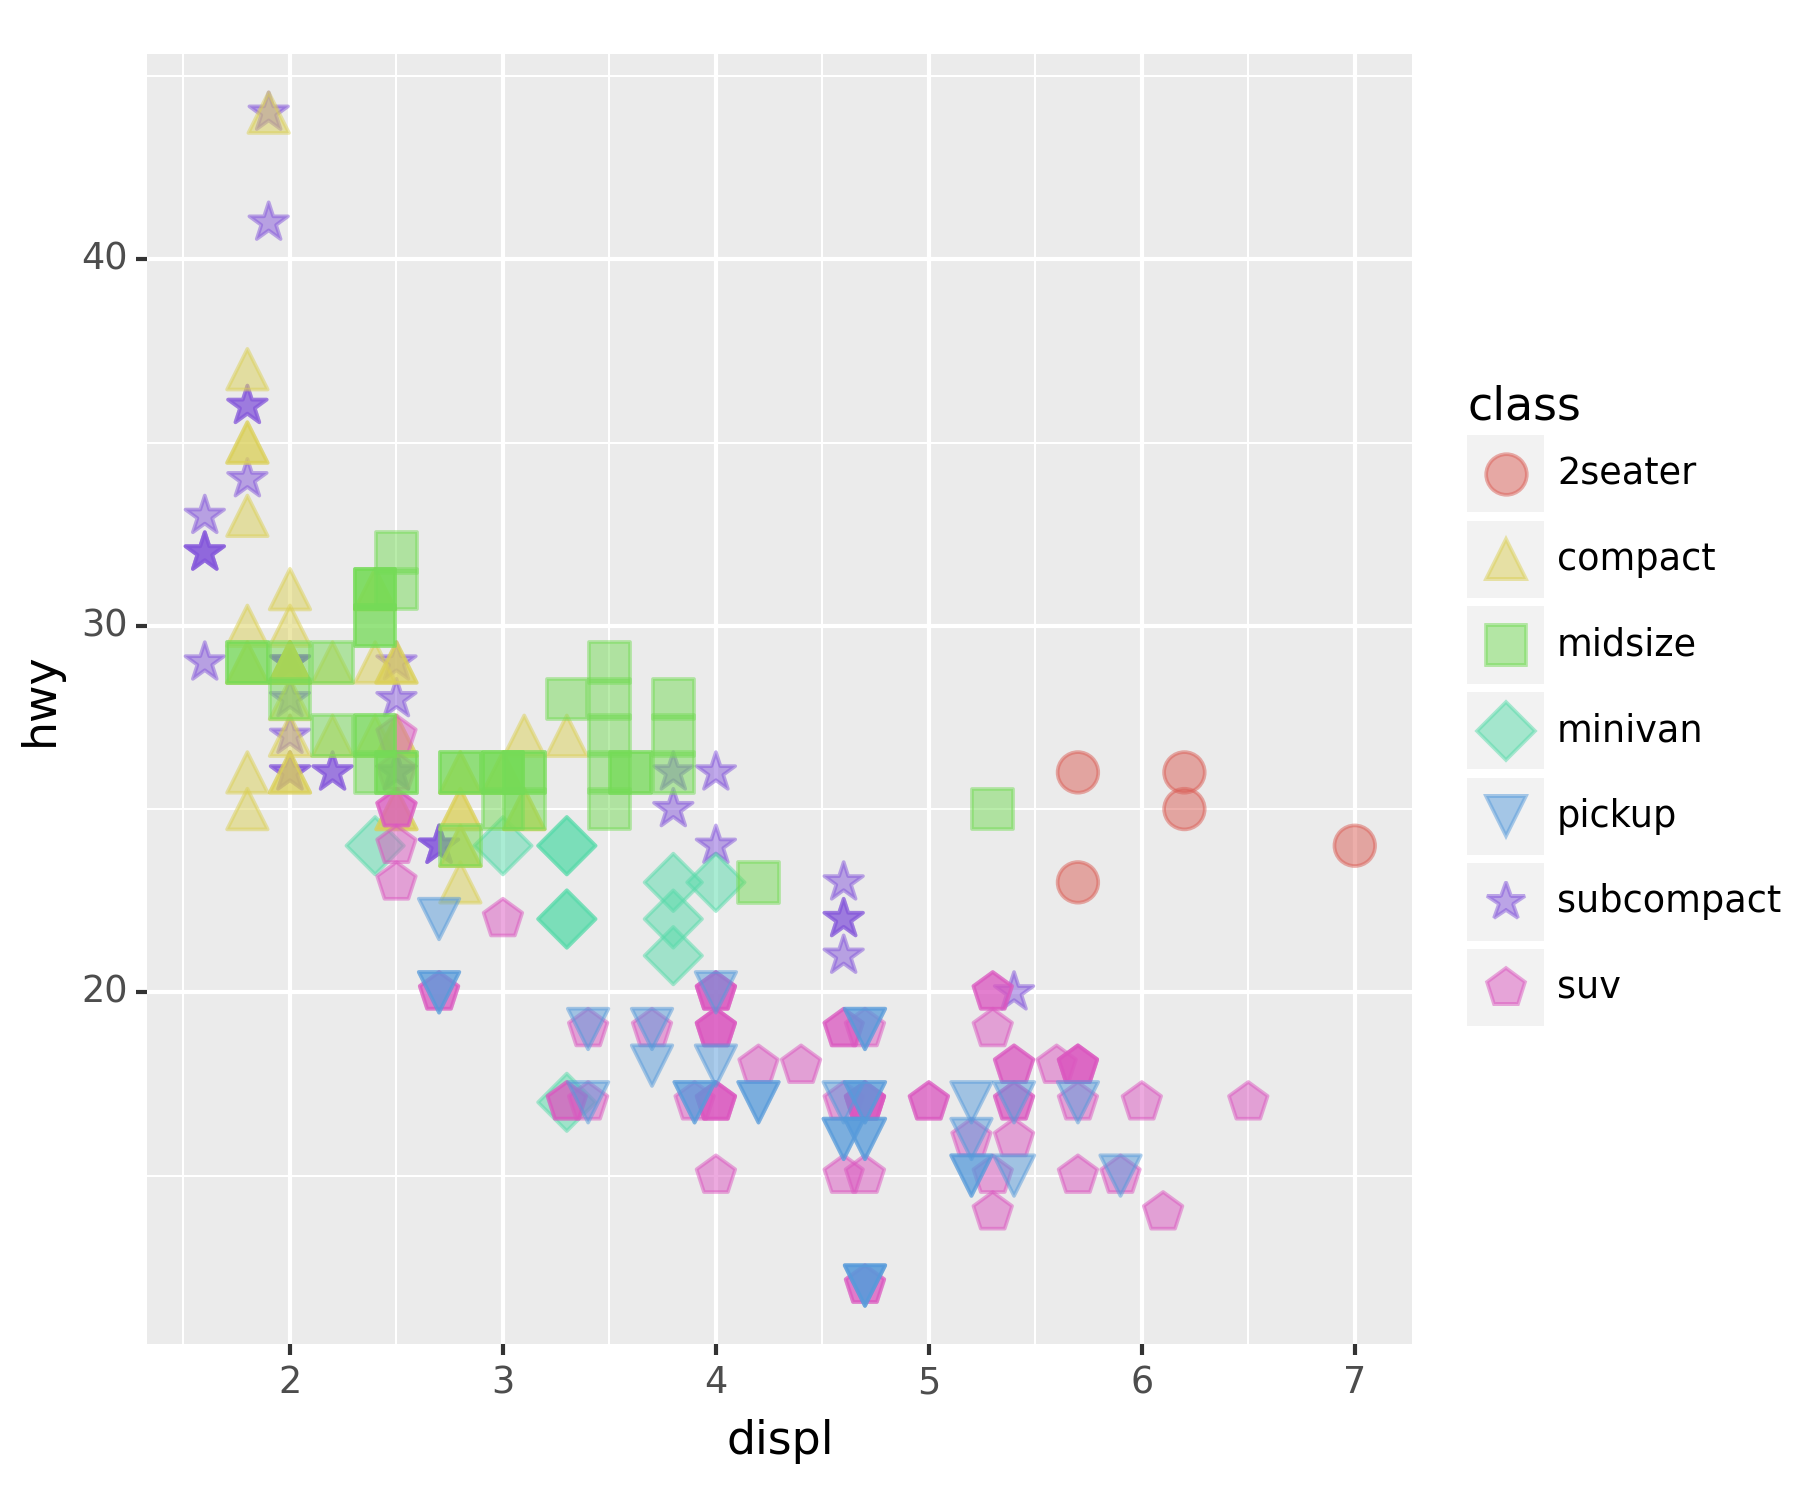

In [15]:
ggplot(df) + geom_point(aes(x='displ',y='hwy',color='class',shape='class'),size=5,alpha=0.5)

# 6. `mpg`의 시각화: 4차원, 5차원

## A. `x=displ`, `y=hwy`, `color=drv`, `shape=class`

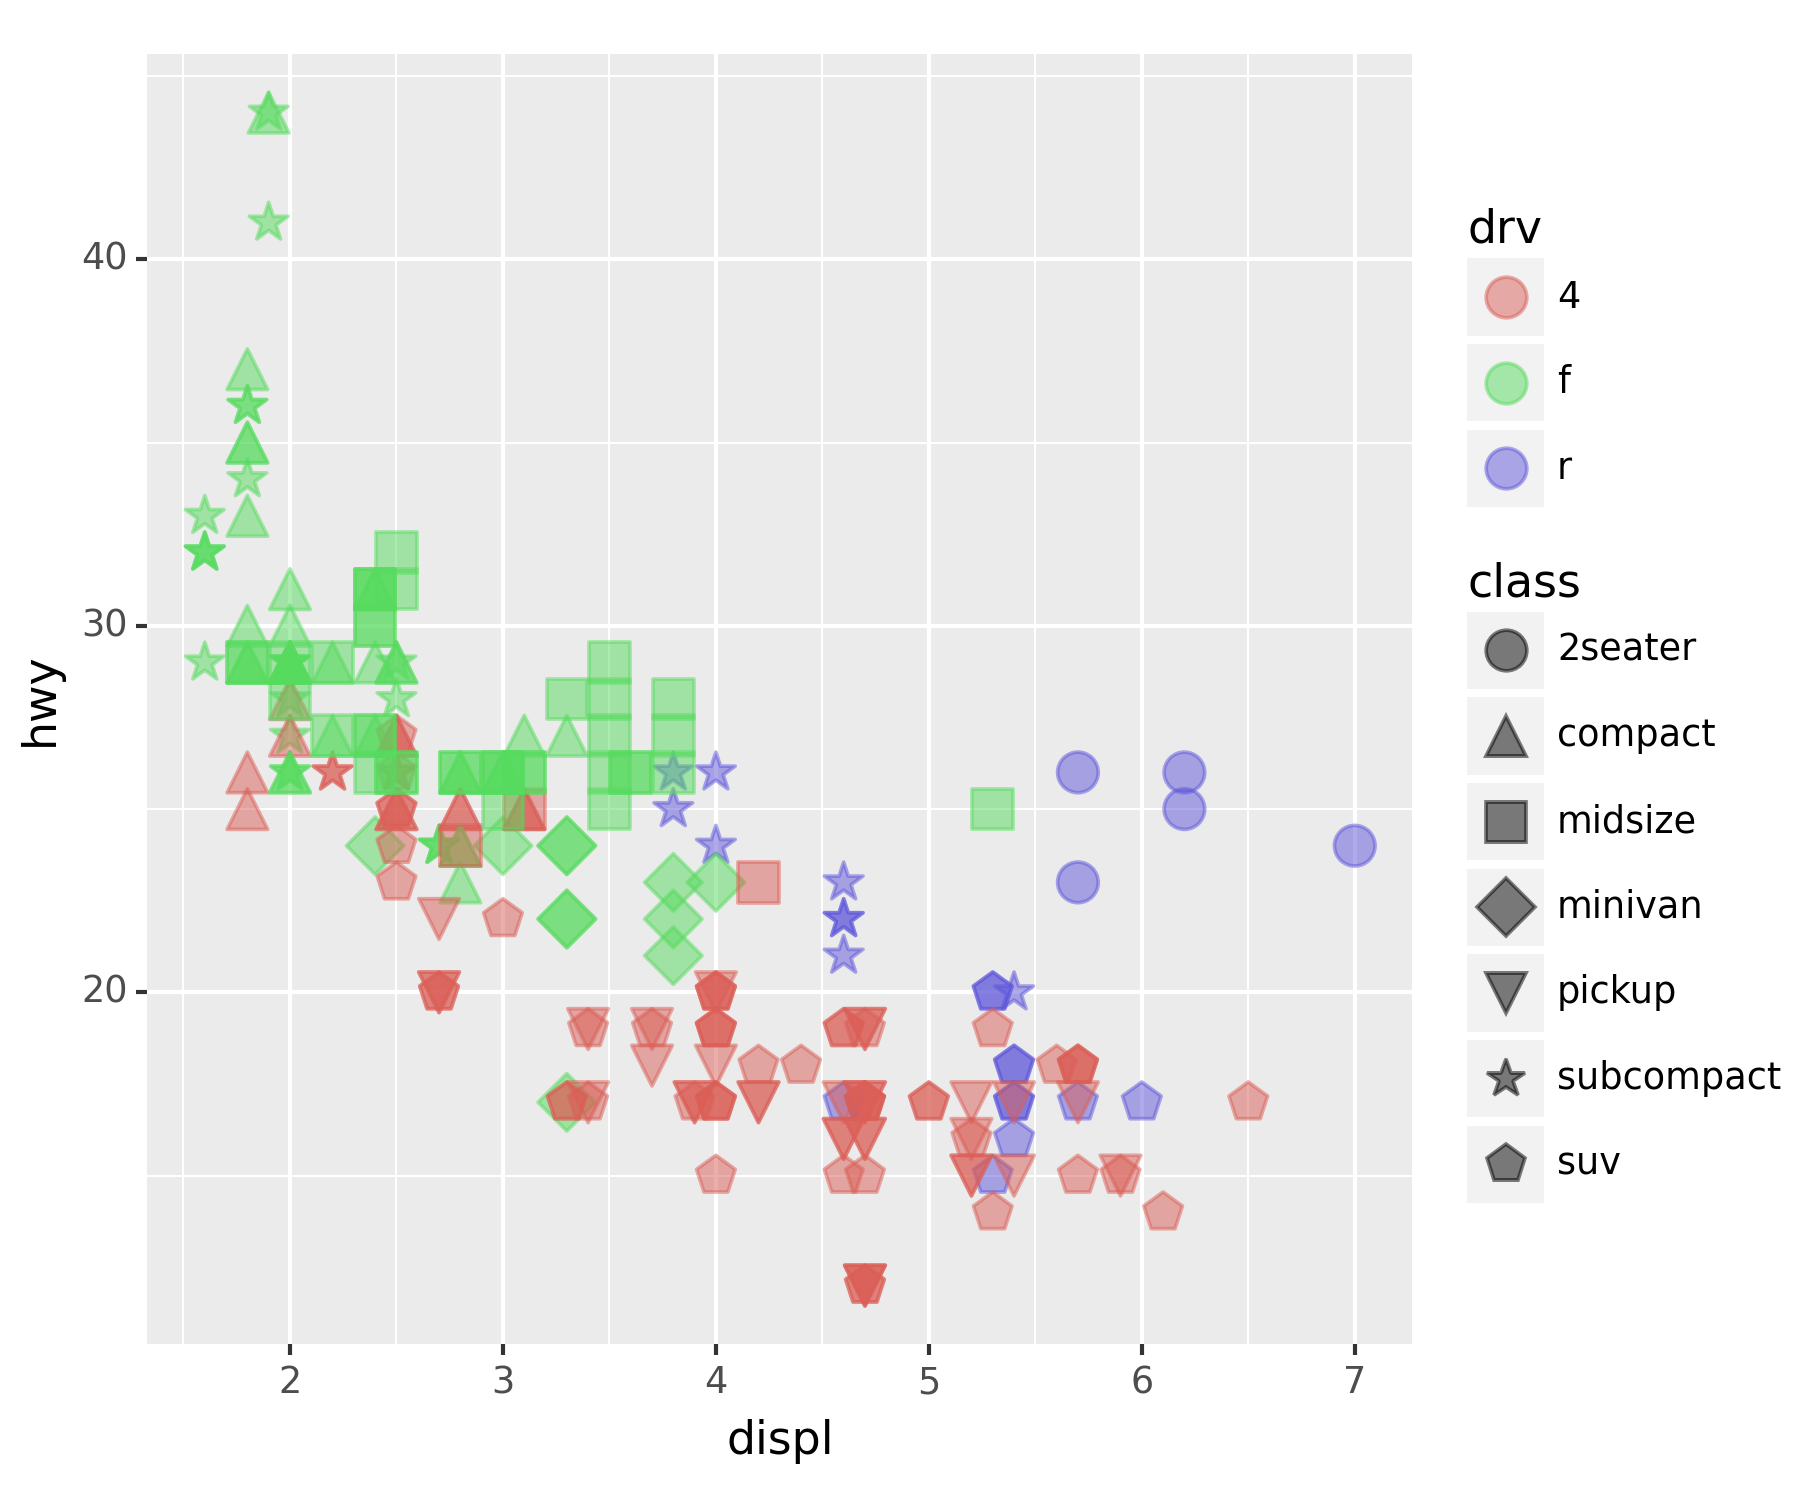

In [16]:
ggplot(df) + geom_point(aes(x='displ',y='hwy',color='drv',shape='class'),size=5,alpha=0.5)

## B. `x=displ`, `y=hwy`, `color=drv`, `shape=class`, `size=cyl`

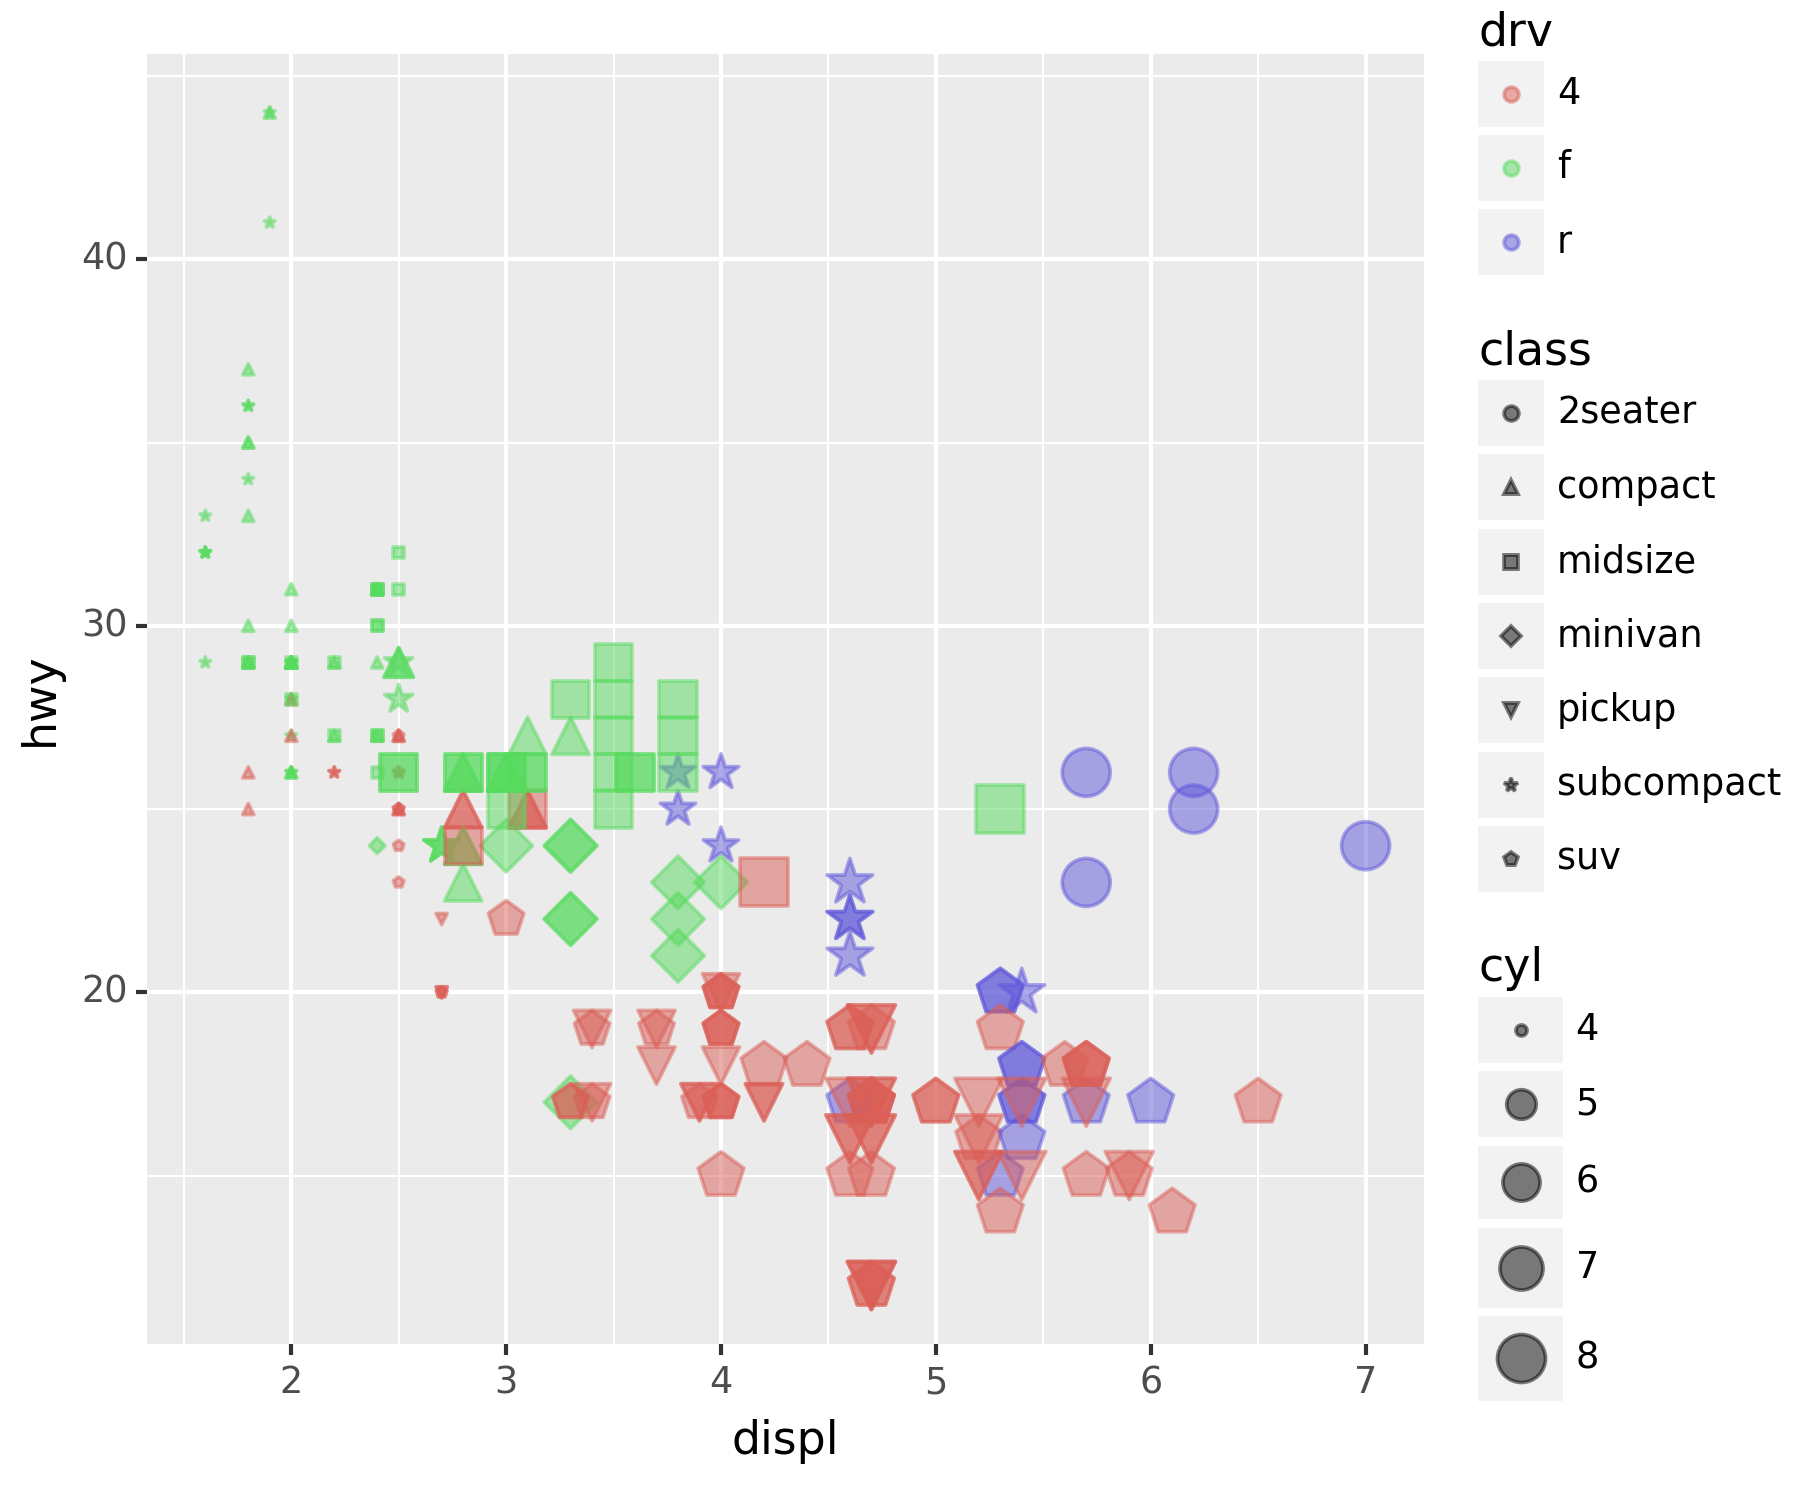

In [17]:
ggplot(df) + geom_point(aes(x='displ',y='hwy',color='drv',shape='class',size='cyl'),alpha=0.5)

# 7. 객체지향적 시각화

`-` `ggplot`은 정체가 뭐지?

In [18]:
type(ggplot)

`-` `geom_point`은 정체가 뭐지?

In [19]:
type(geom_point)

## A. `fig`

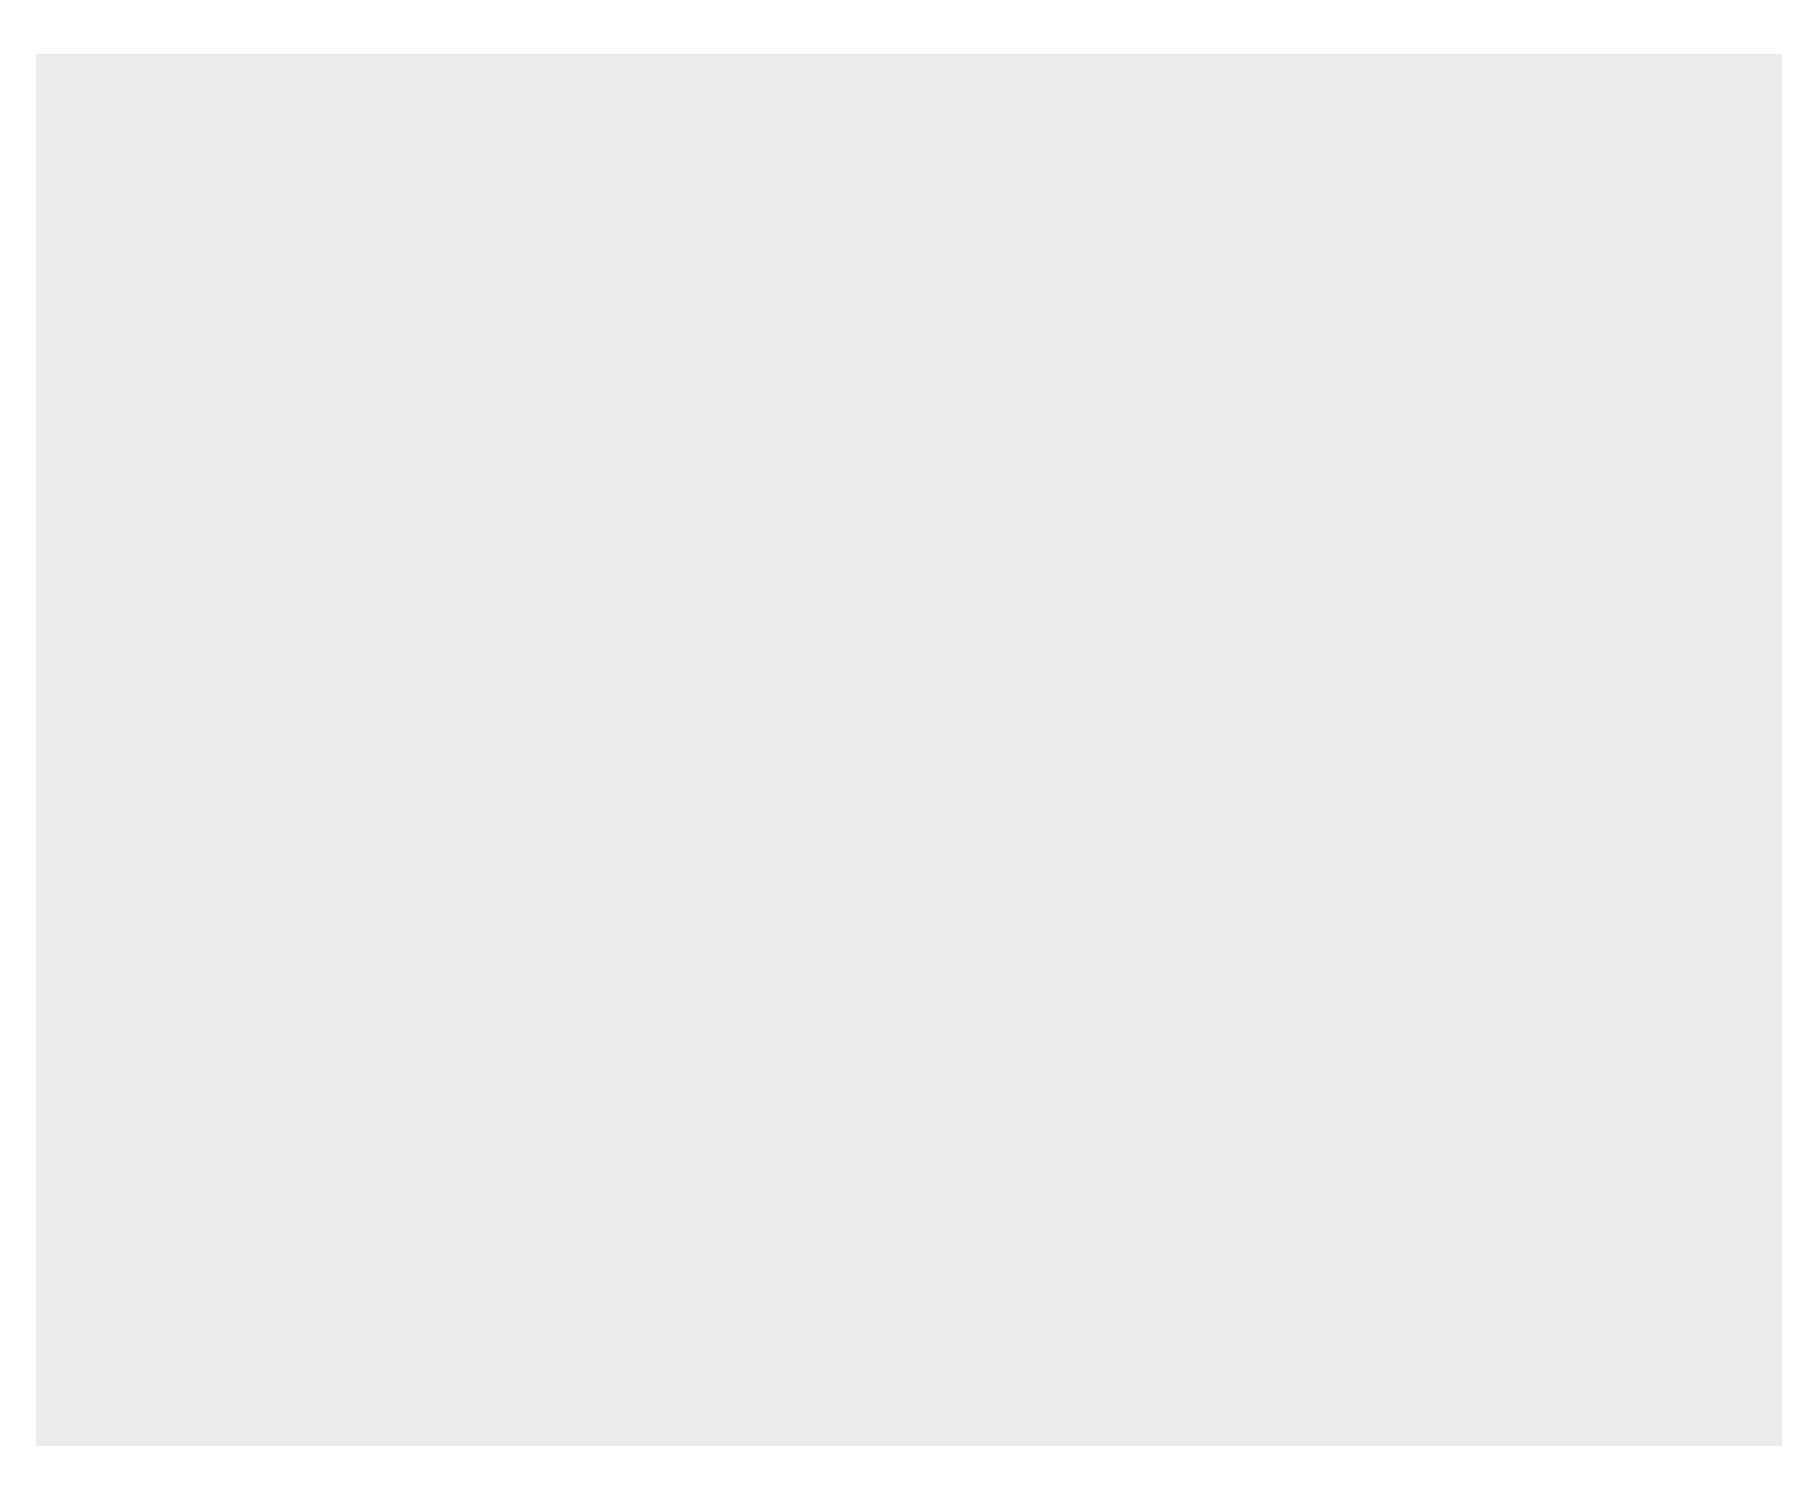

In [20]:
fig = ggplot(df) # ggplot은 클래스, fig는 ggplot에서 찍힌 인스턴스
fig

## B. `geom_point()`

In [21]:
point = geom_point(aes(x='displ',y='hwy'))
point

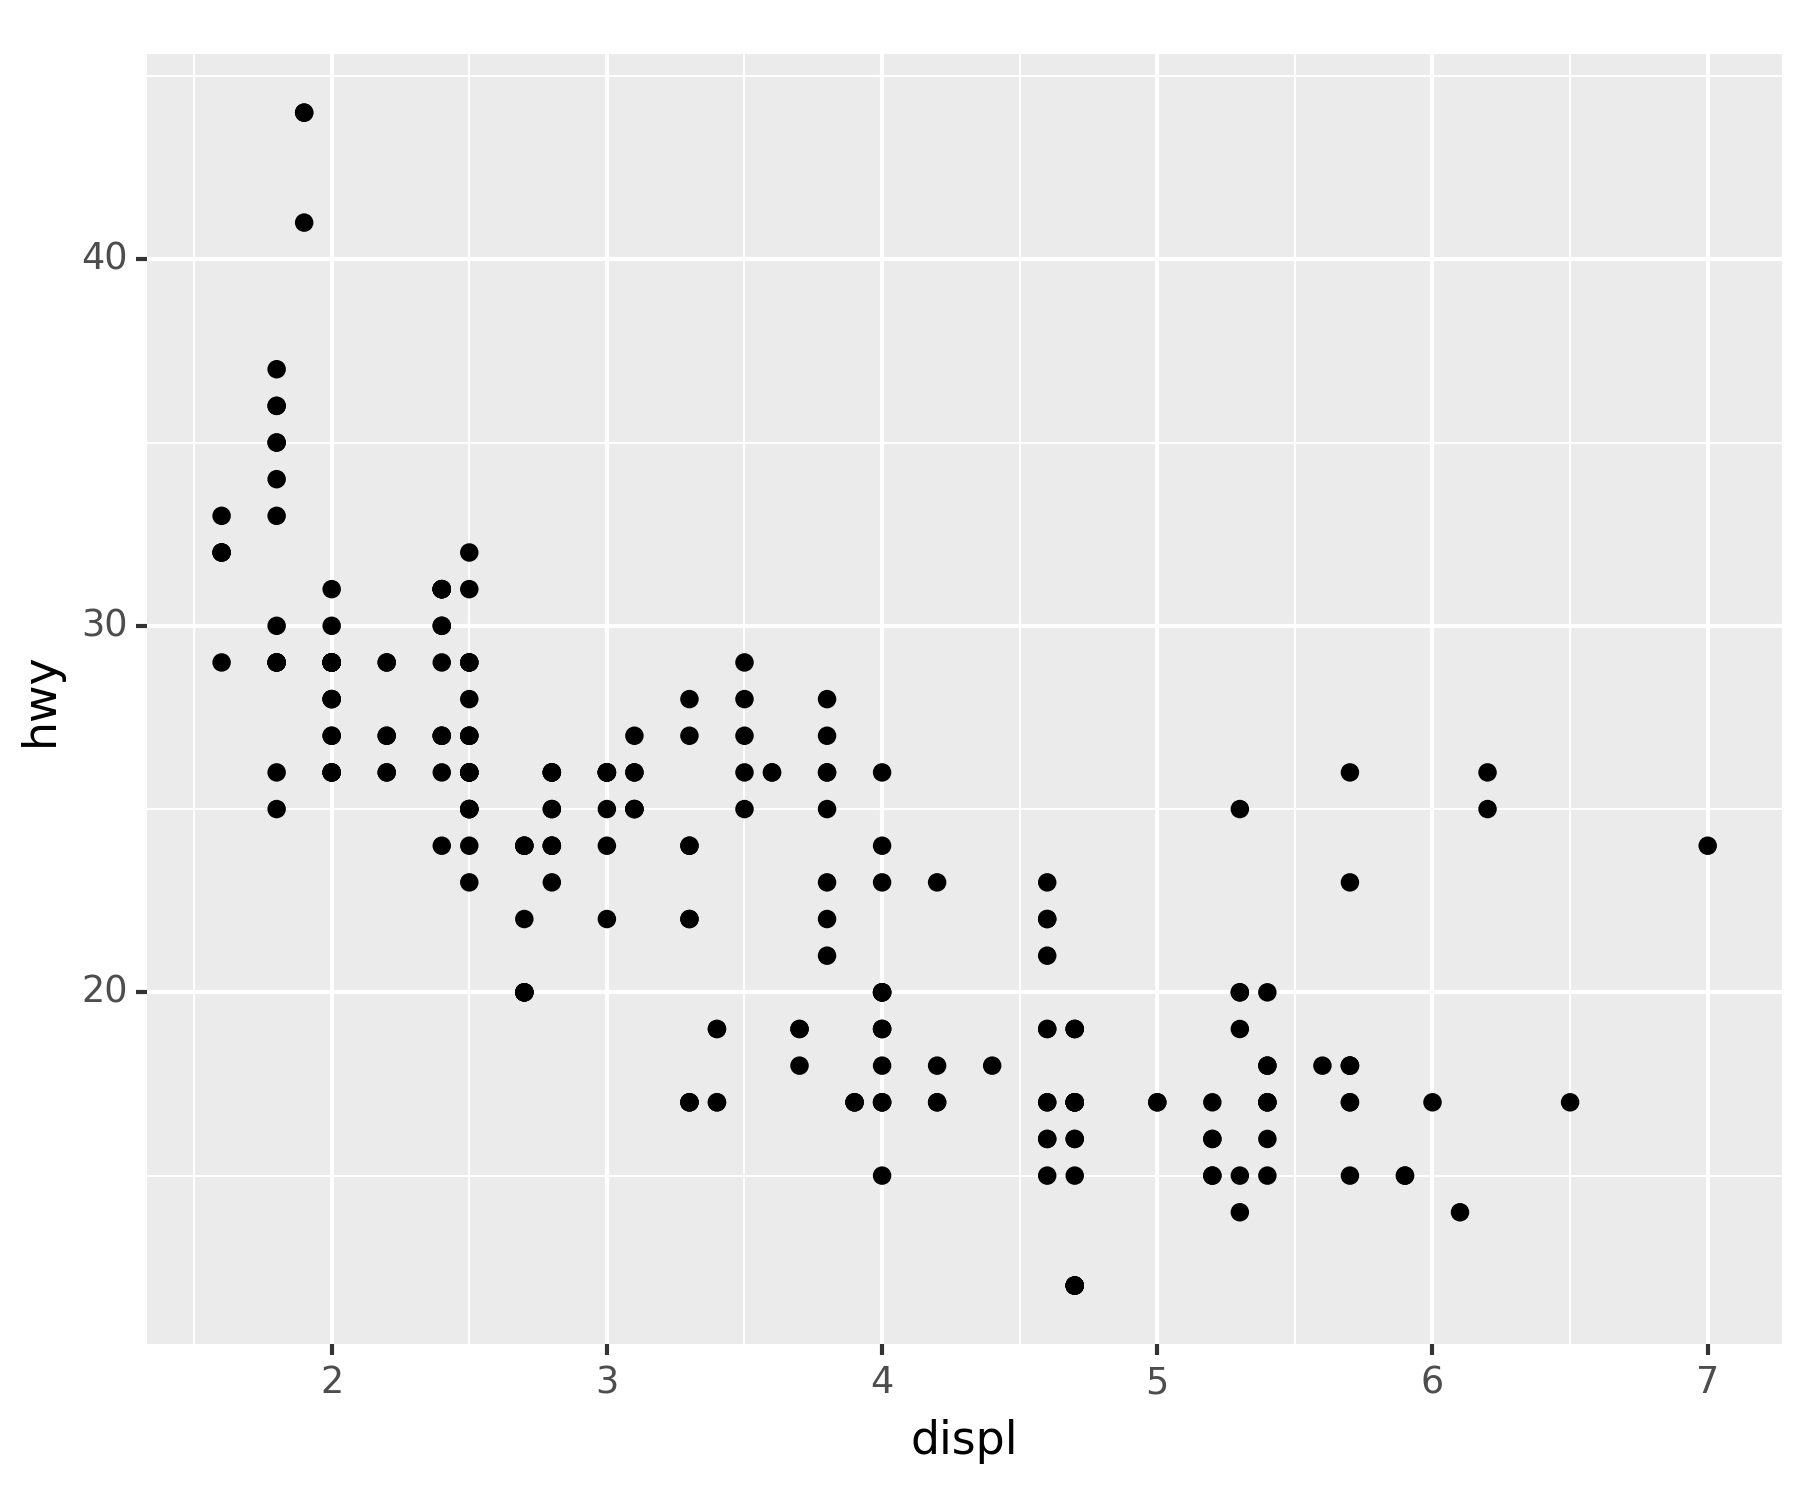

In [22]:
fig+point

## C. `geom_smooth()`

In [23]:
smooth = geom_smooth(aes(x='displ',y='hwy'))

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.

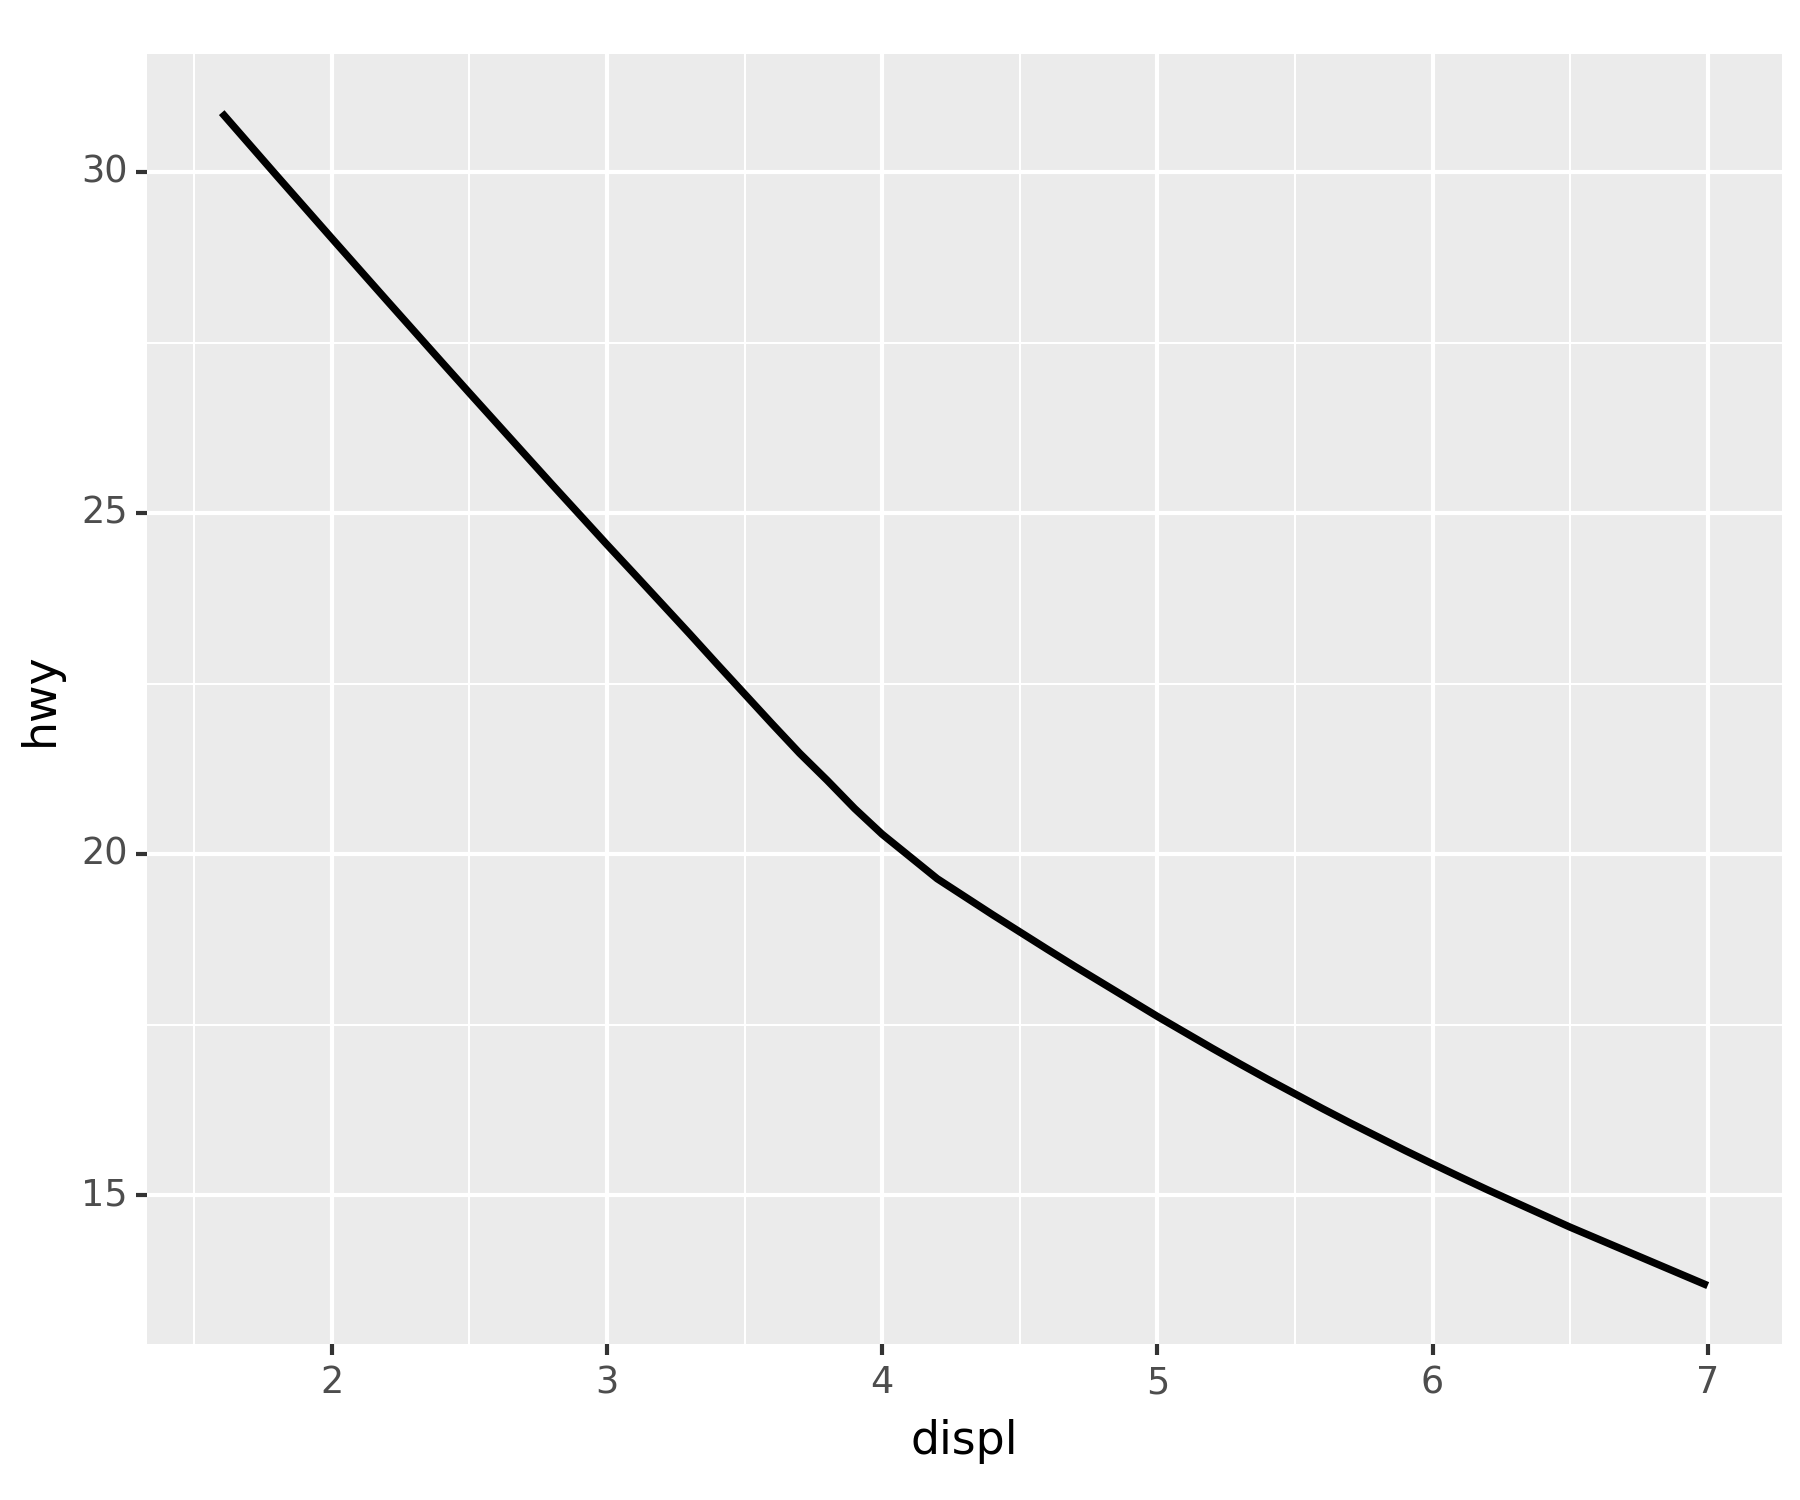

In [24]:
fig+smooth

## D. `geom_point()` + `geom_smooth()`

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.

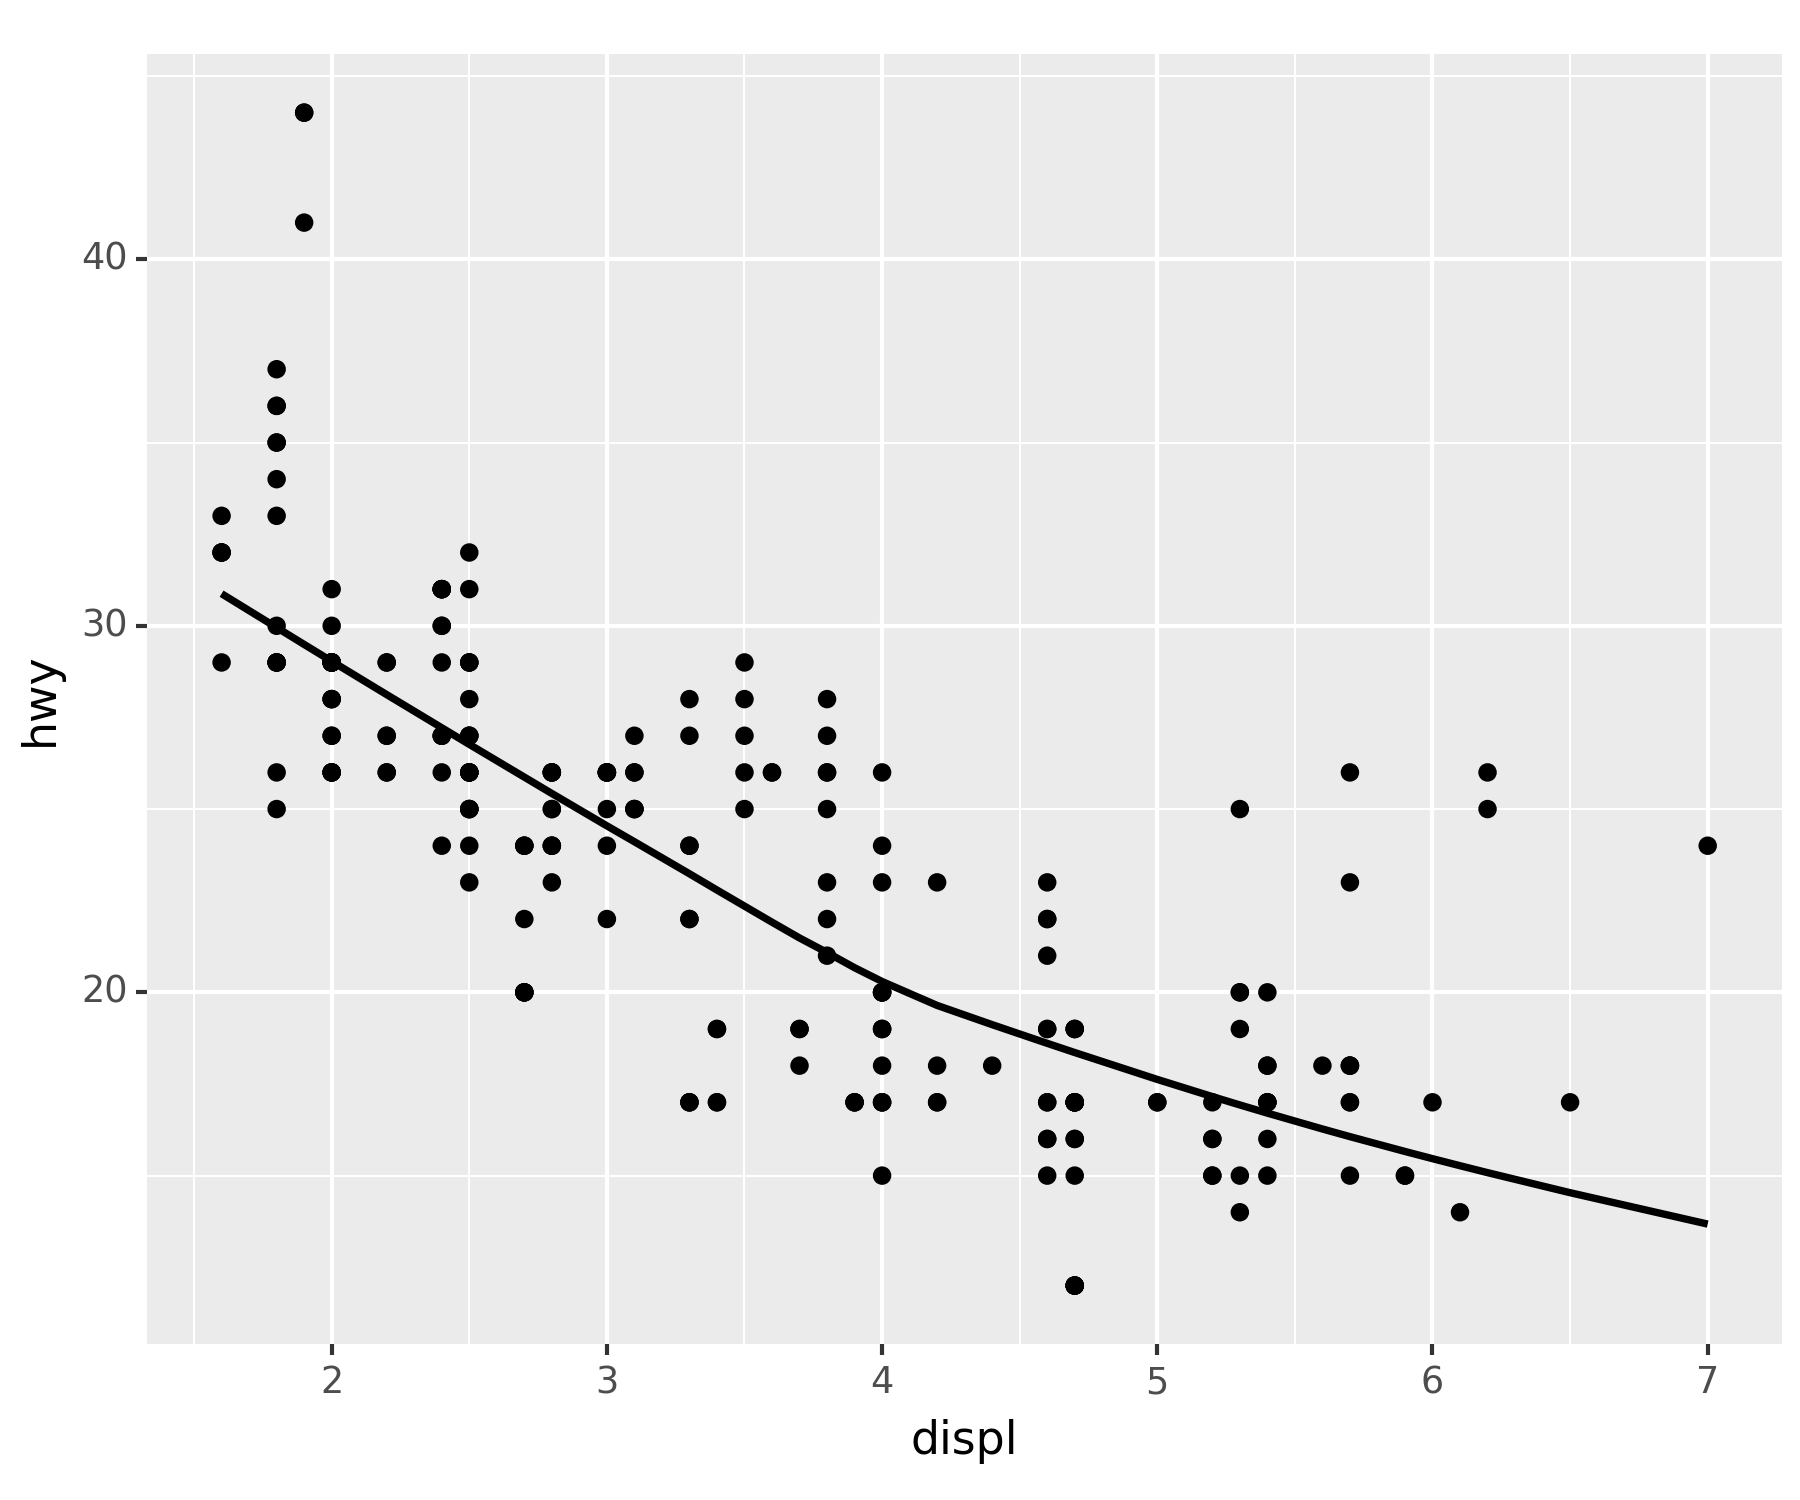

In [25]:
fig + point + smooth
ggplot(df)+geom_point(aes(x='displ',y='hwy'))+geom_smooth(aes(x='displ',y='hwy'))

## E. `geom_point()` – better

In [26]:
# ggplot(df) + geom_point(aes(x='displ',y='hwy',color='drv',size='cyl'),alpha=0.5)
point_better = geom_point(aes(x='displ',y='hwy',color='drv',size='cyl'),alpha=0.5)

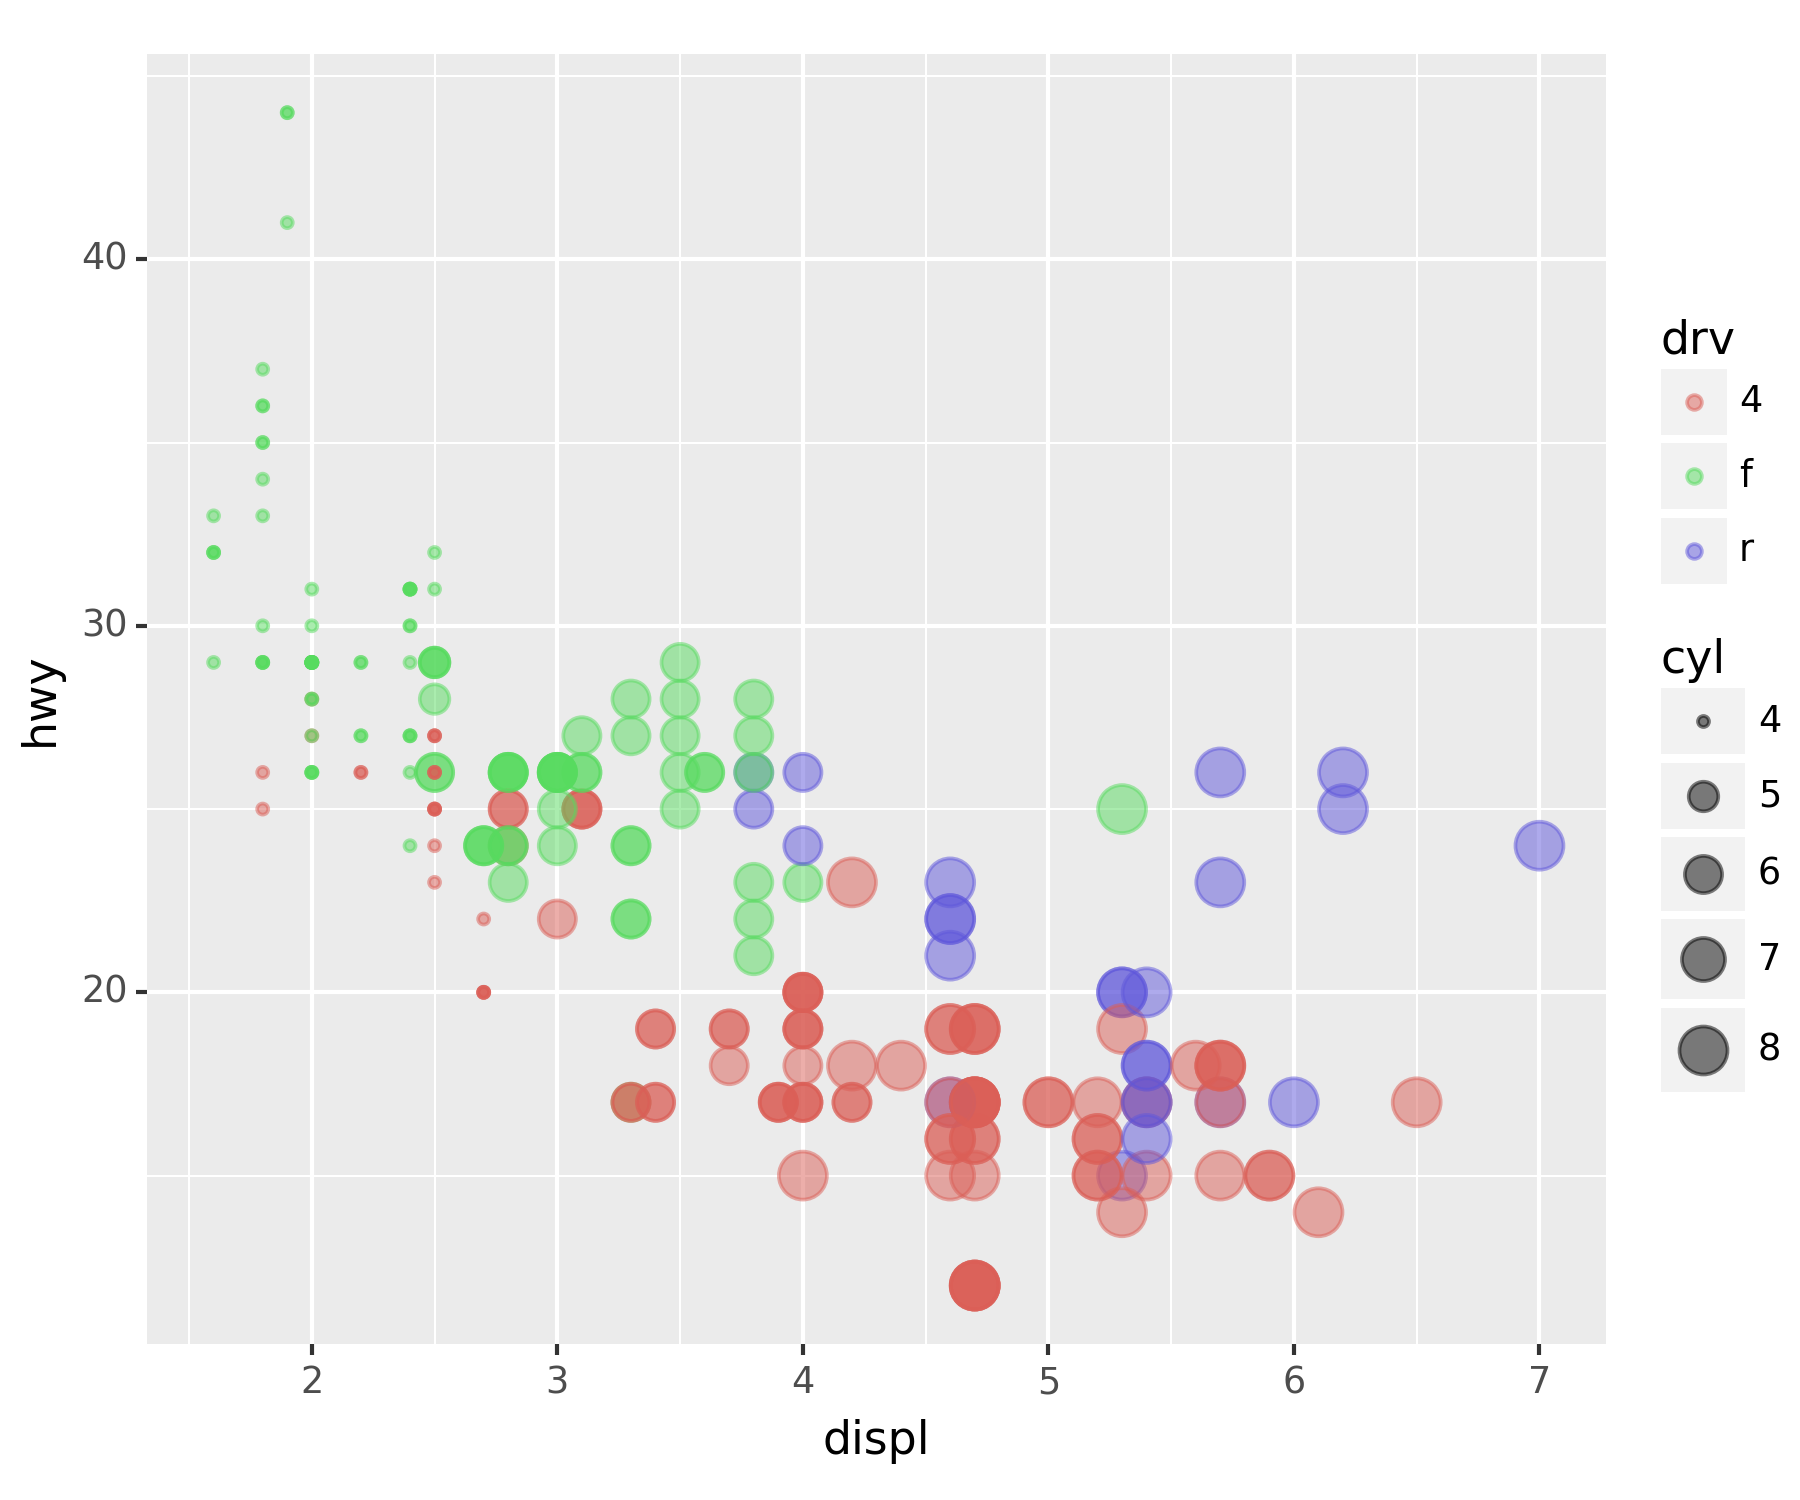

In [27]:
fig + point_better

## F. `geom_smooth()` – better

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.

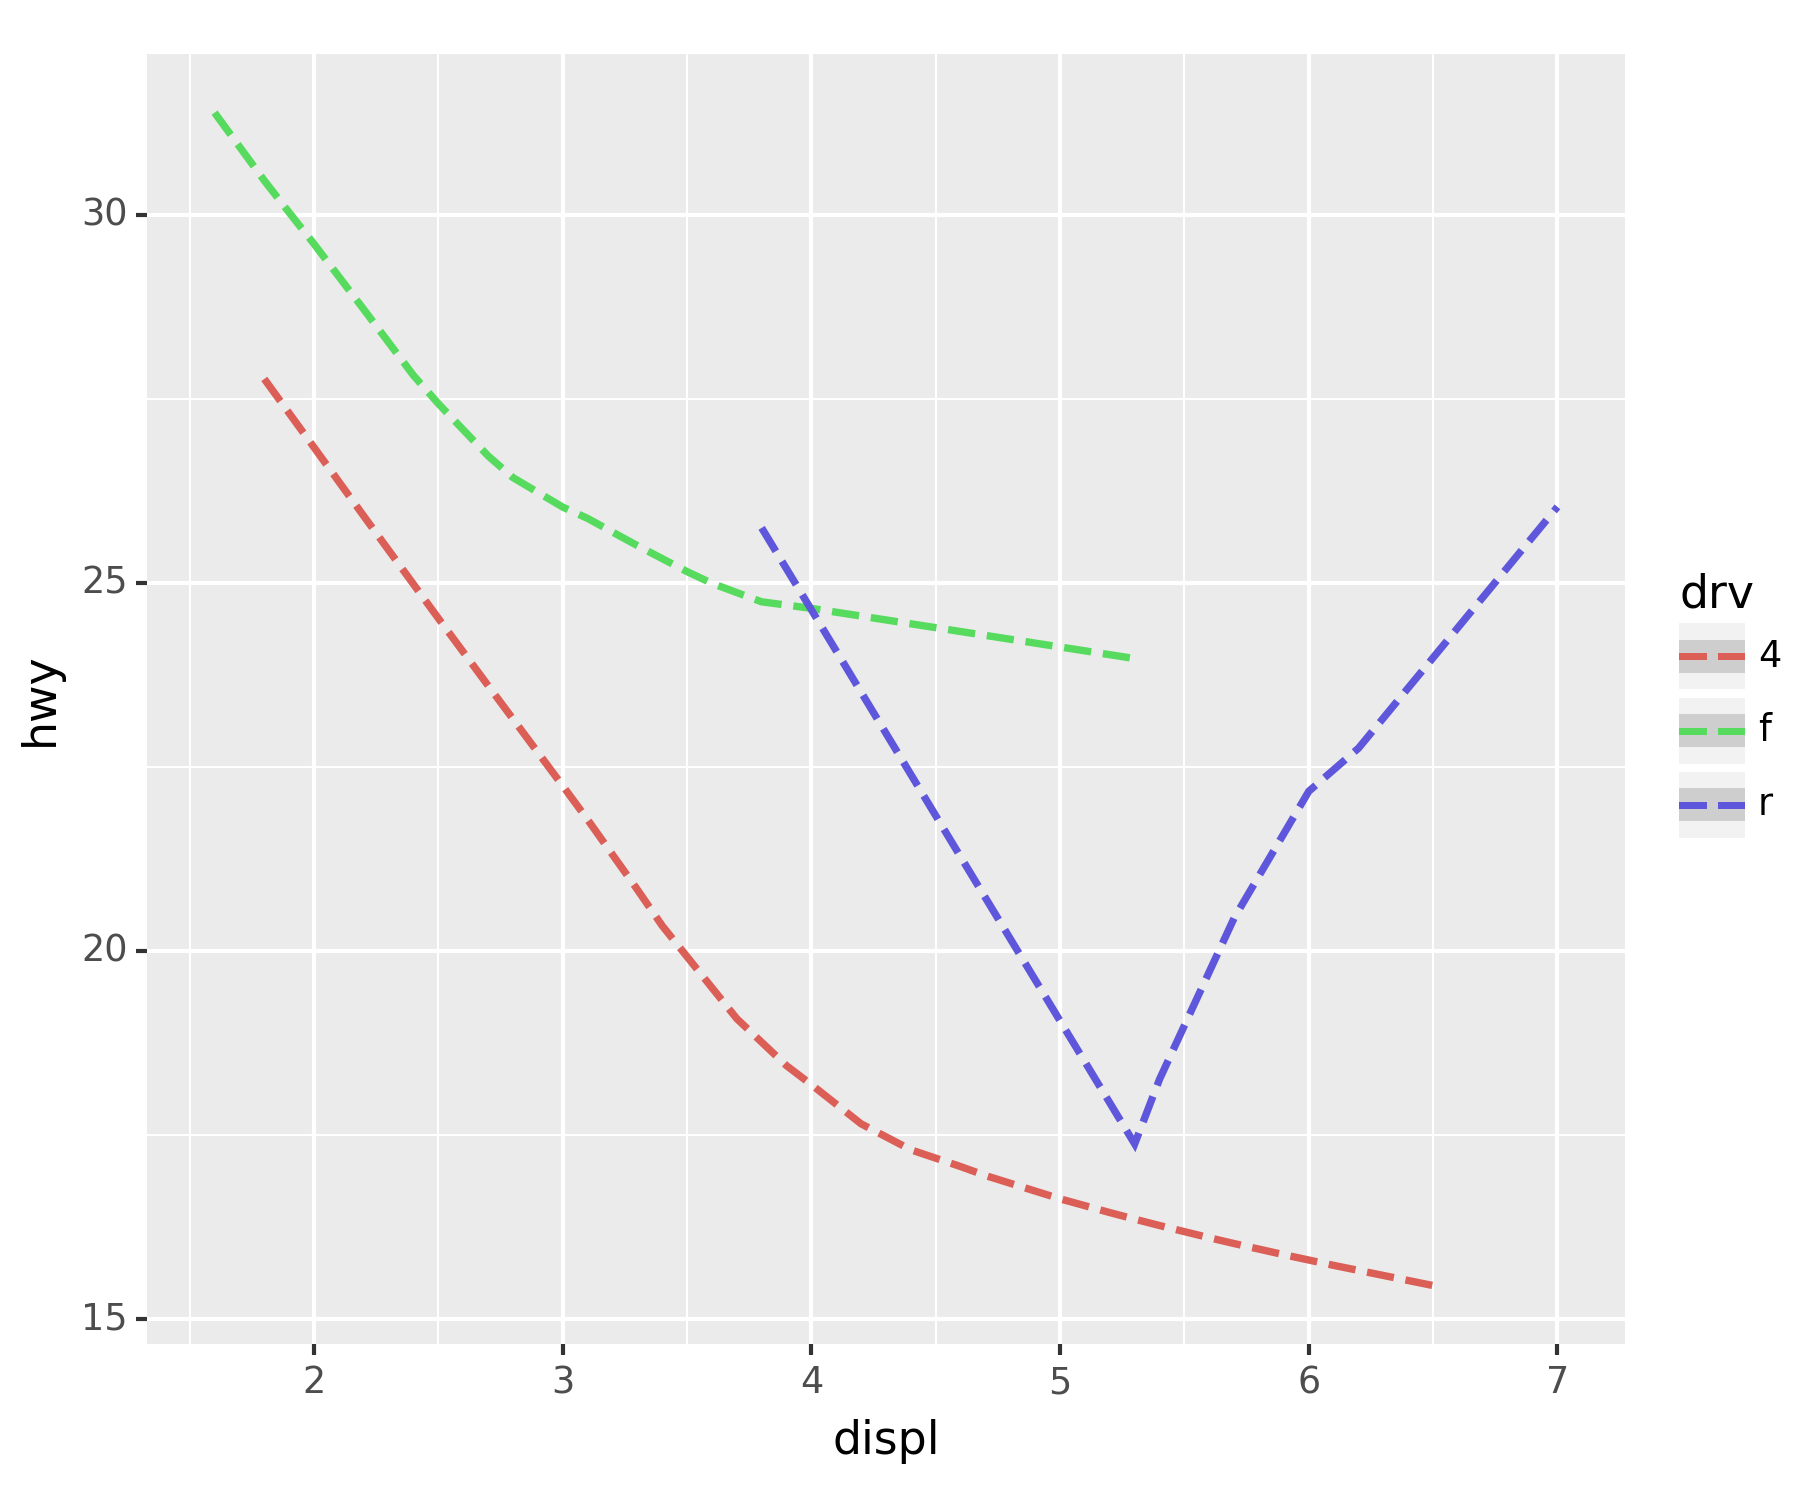

In [28]:
fig = ggplot(df) 
smooth_better = geom_smooth(aes(x='displ',y='hwy',color='drv'),linetype='dashed')
fig+smooth_better

## G. 다양한 조합

`-` 예시1: fig, point, smooth

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.

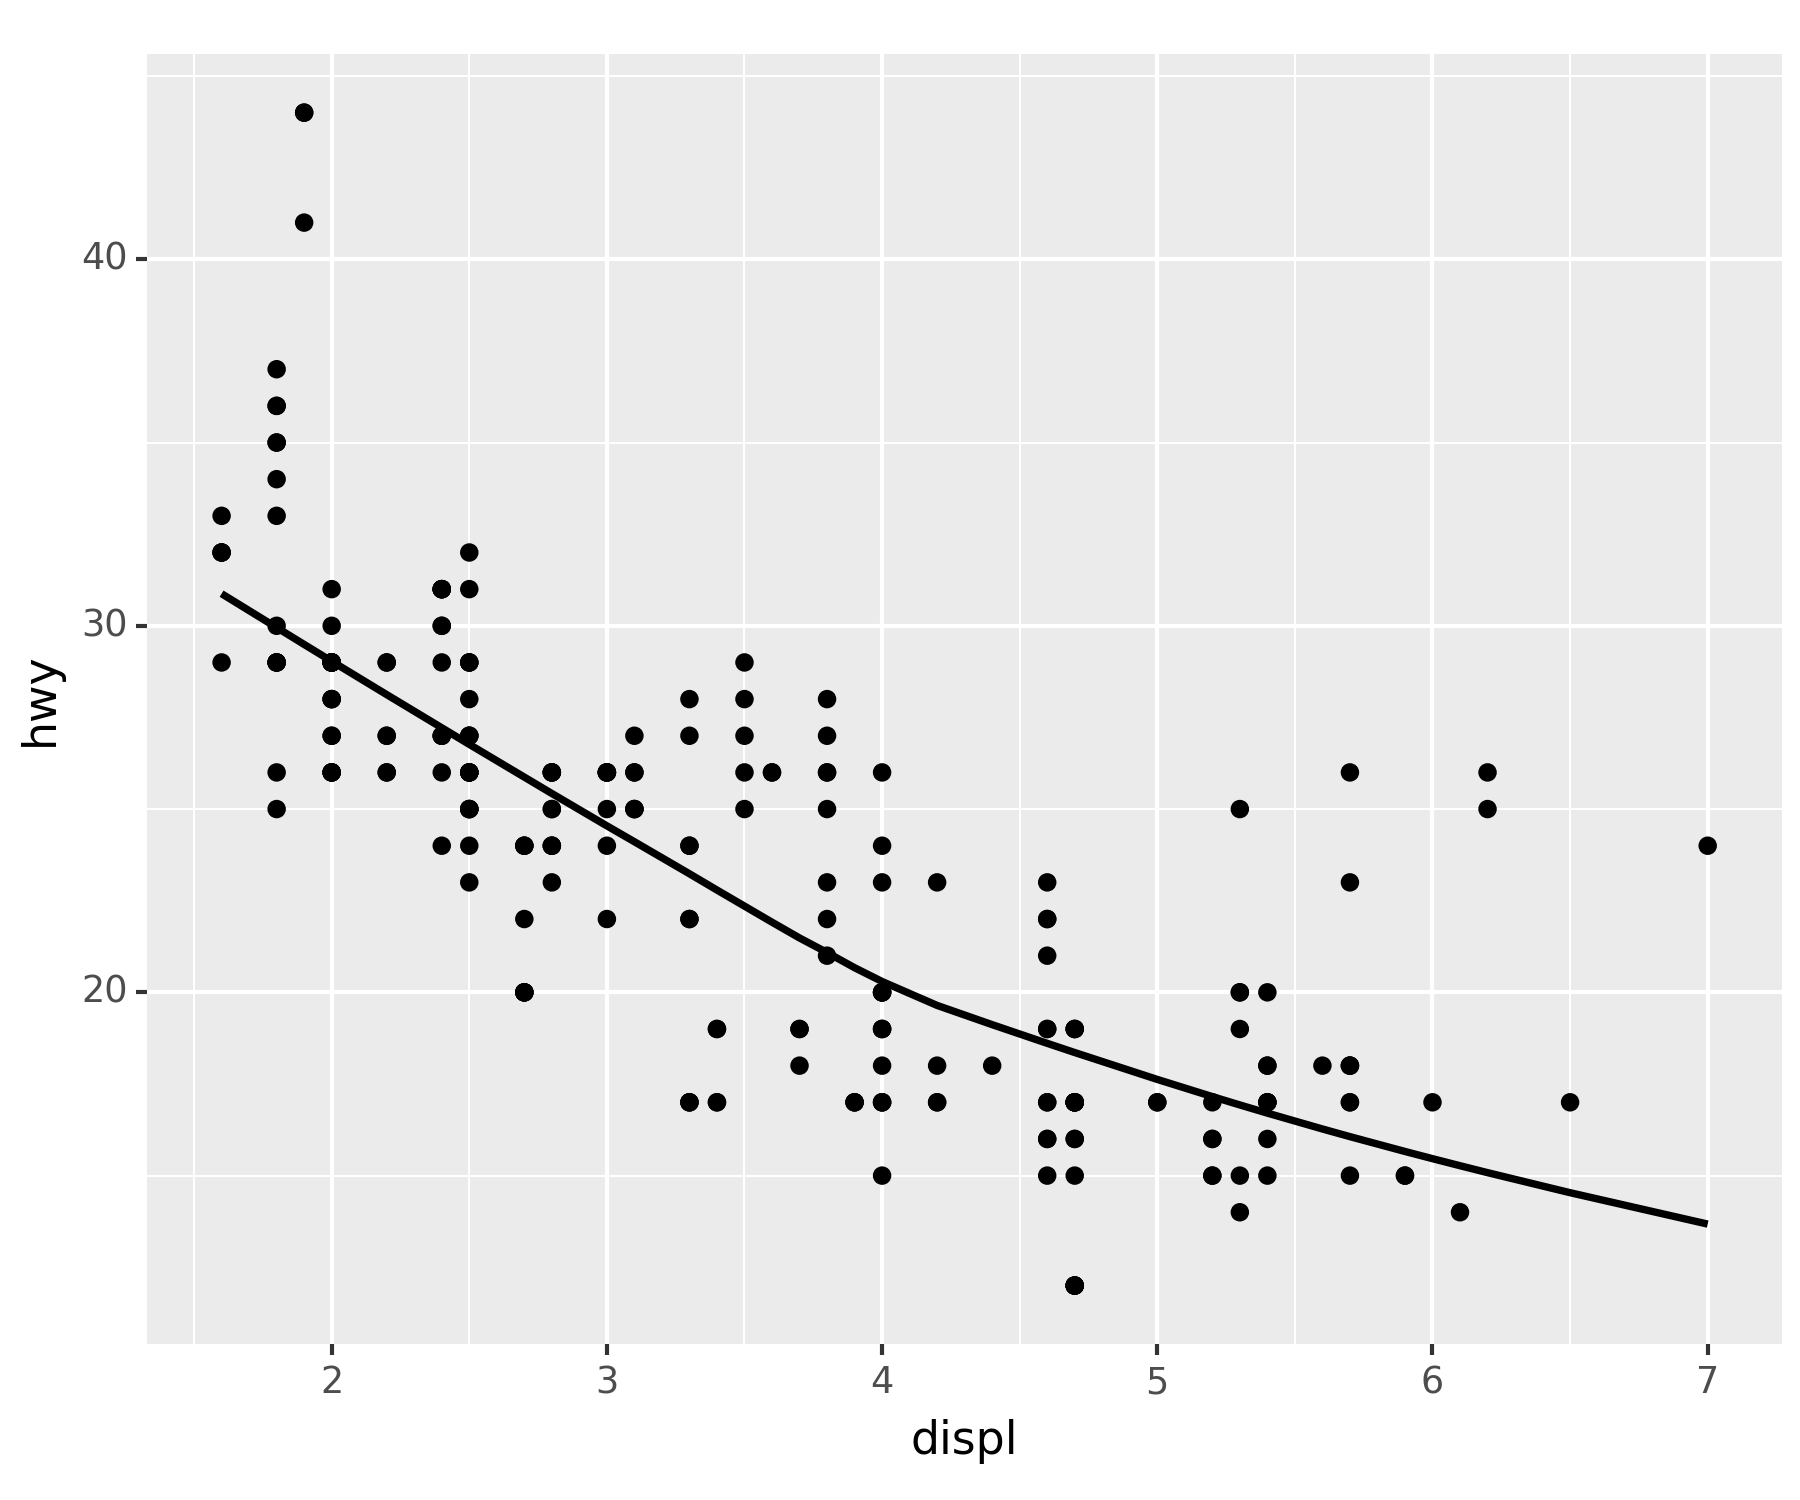

In [29]:
fig + point + smooth

`-` 예시2: fig, point_better, smooth_better

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.

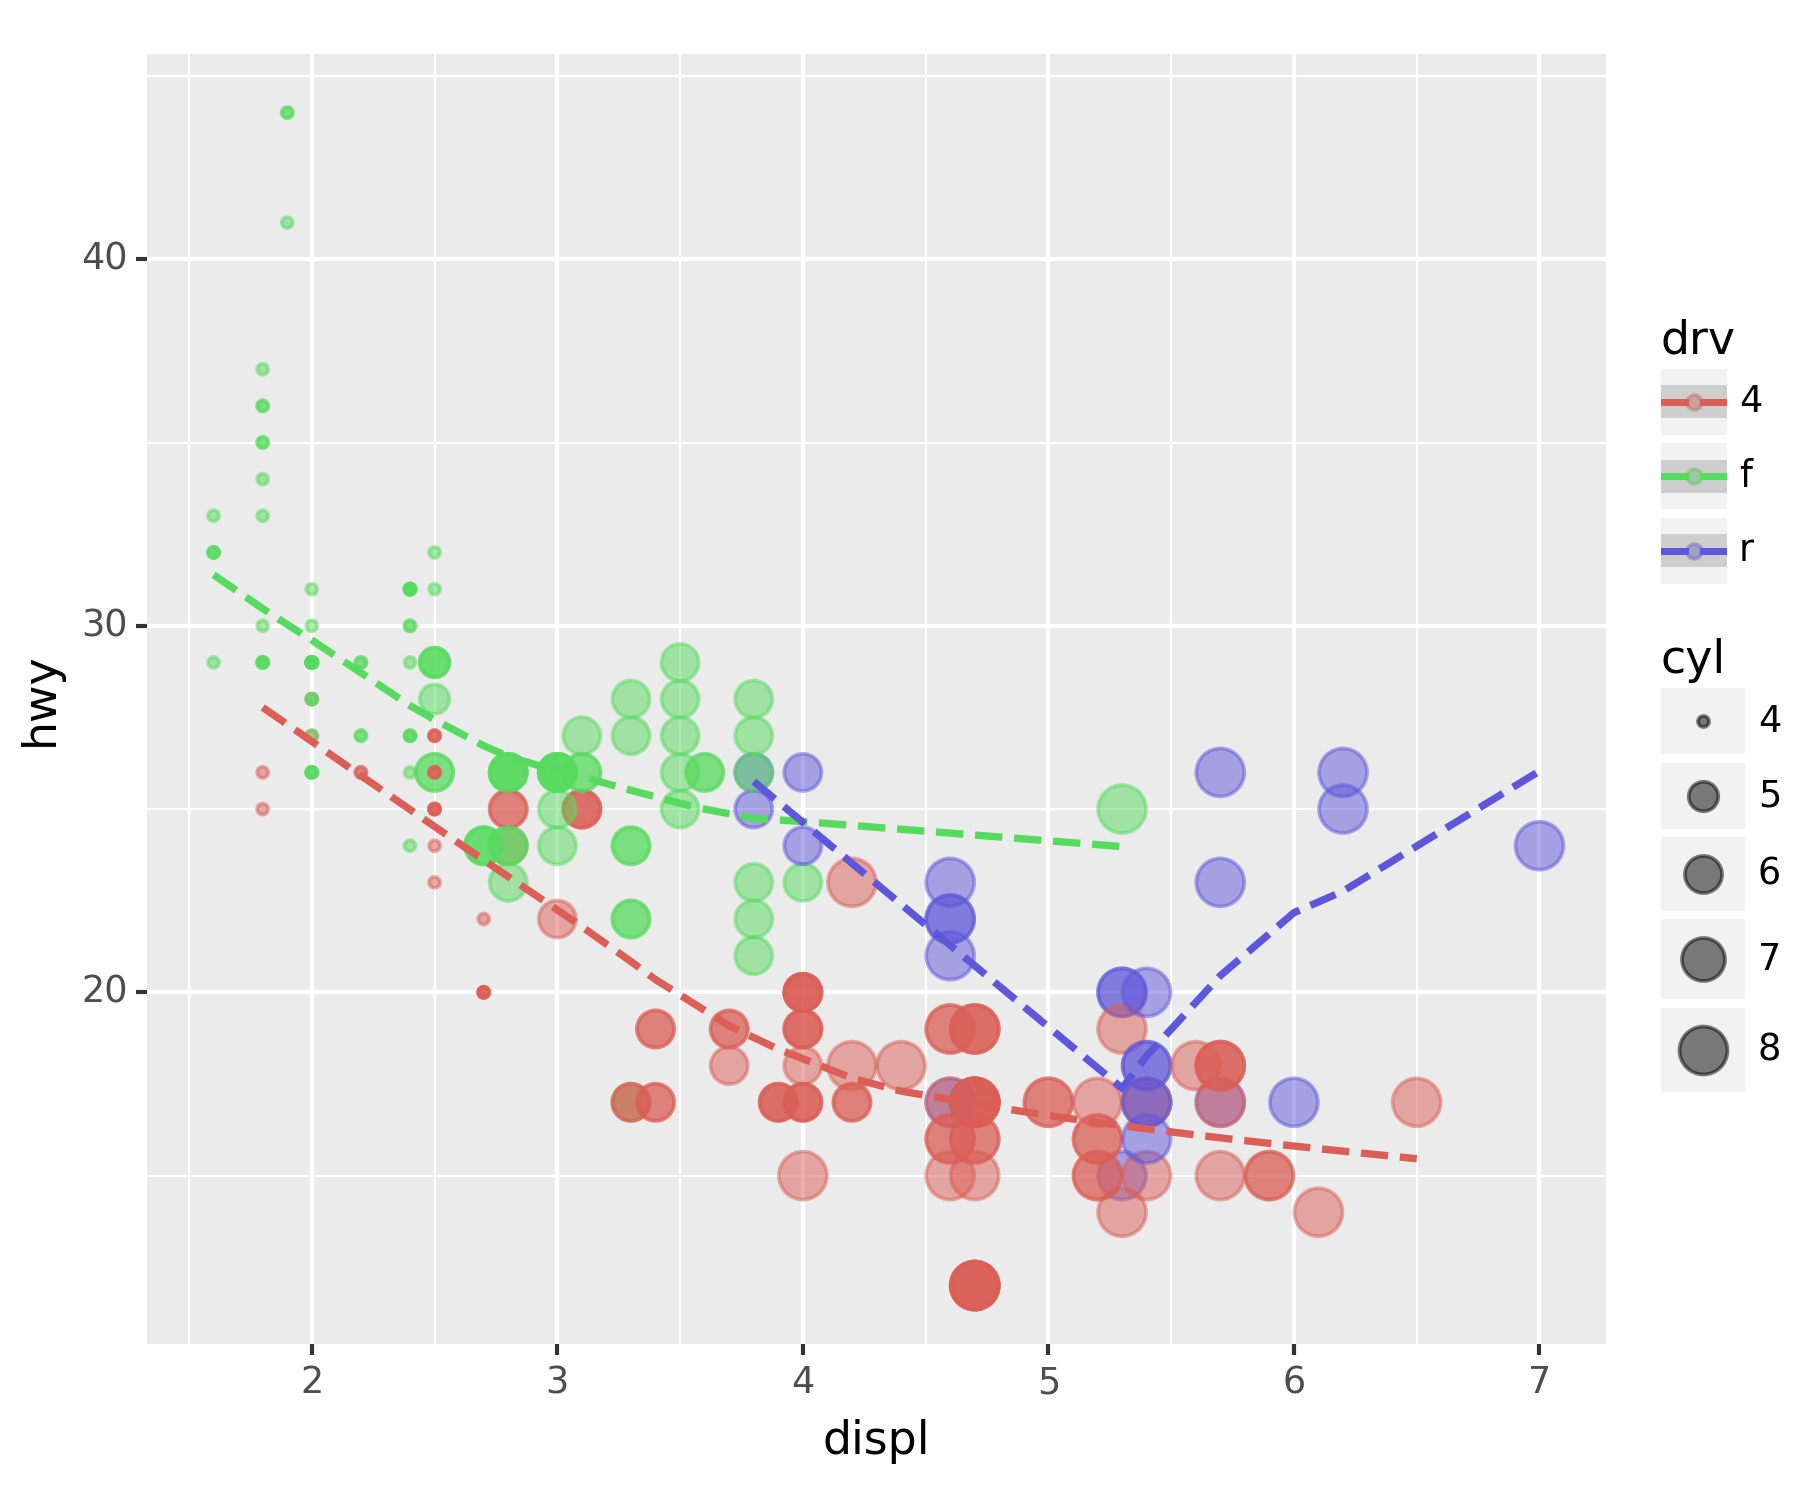

In [30]:
fig + point_better + smooth_better

`-` 예시3: fig, point_better, smooth_better, smooth

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.

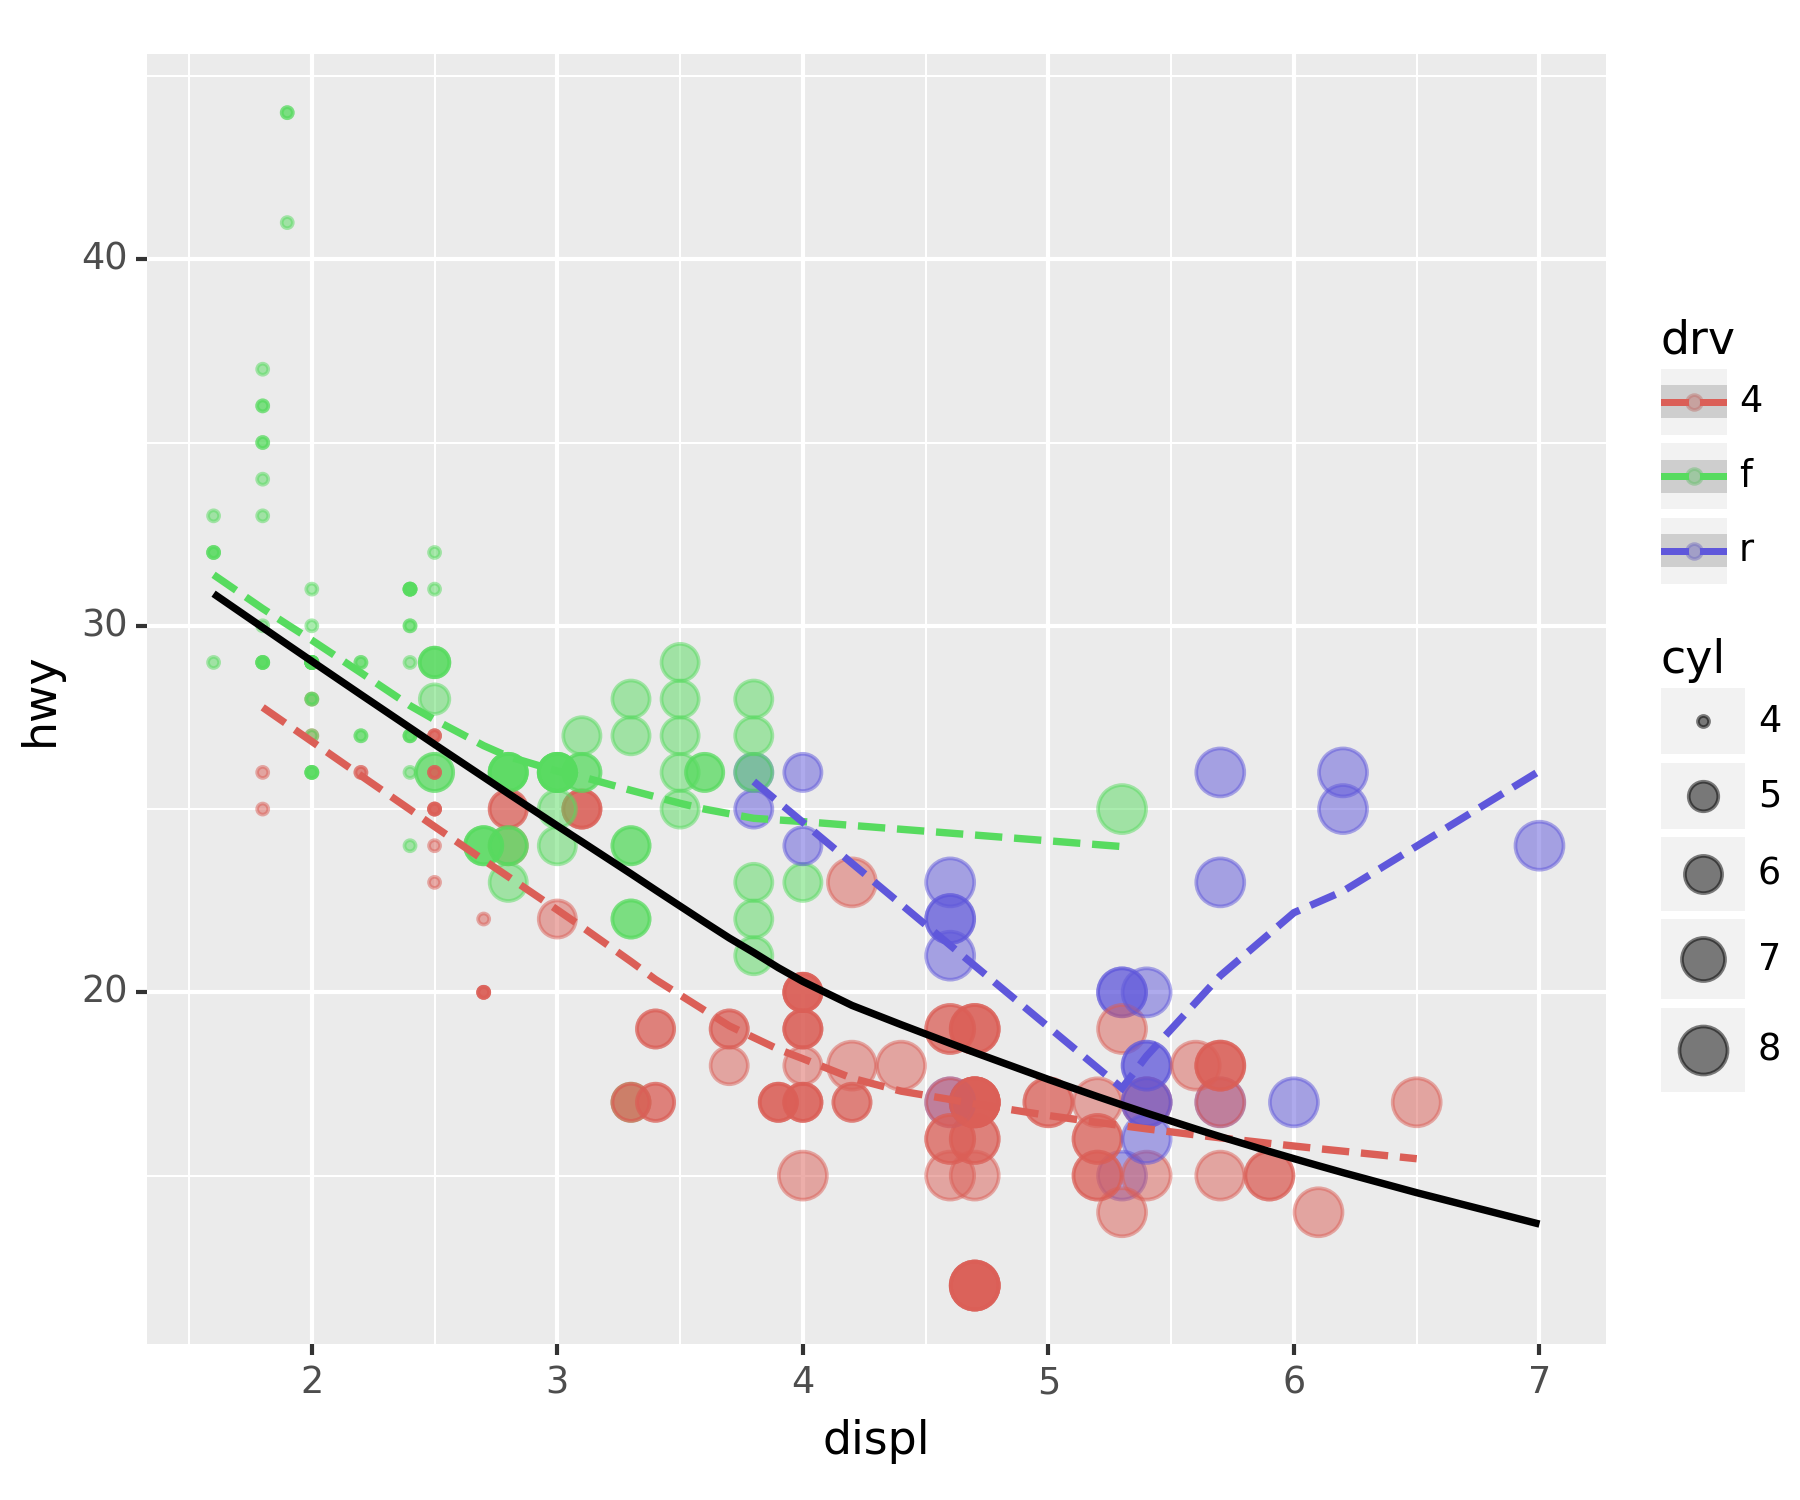

In [31]:
fig + point_better + smooth_better + smooth

# 8. 아이스크림을 많이 먹으면 걸리는 병

## A. 책 읽어보세요

`-` ref: <https://product.kyobobook.co.kr/detail/S000000597846>

-   구매할만한 책입니다.
-   수업에 필요한 내용은
    [여기](https://github.com/guebin/DV2023/blob/main/posts/ds.pdf)에..

`-` 내용요약 - 여름 $\to$ 수영장 $\to$ 소아마비 - 여름 $\to$
아이스크림 - 아이스크림과 소아마비는 상관관계가 높다: 아이스크림
성분중에서 소아마비를 유발하는 유해물질이 있을 것이다 (?)

## B. 기상자료 다운로드

`-` 기상자료 다운로드

In [32]:
temp=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()
#temp

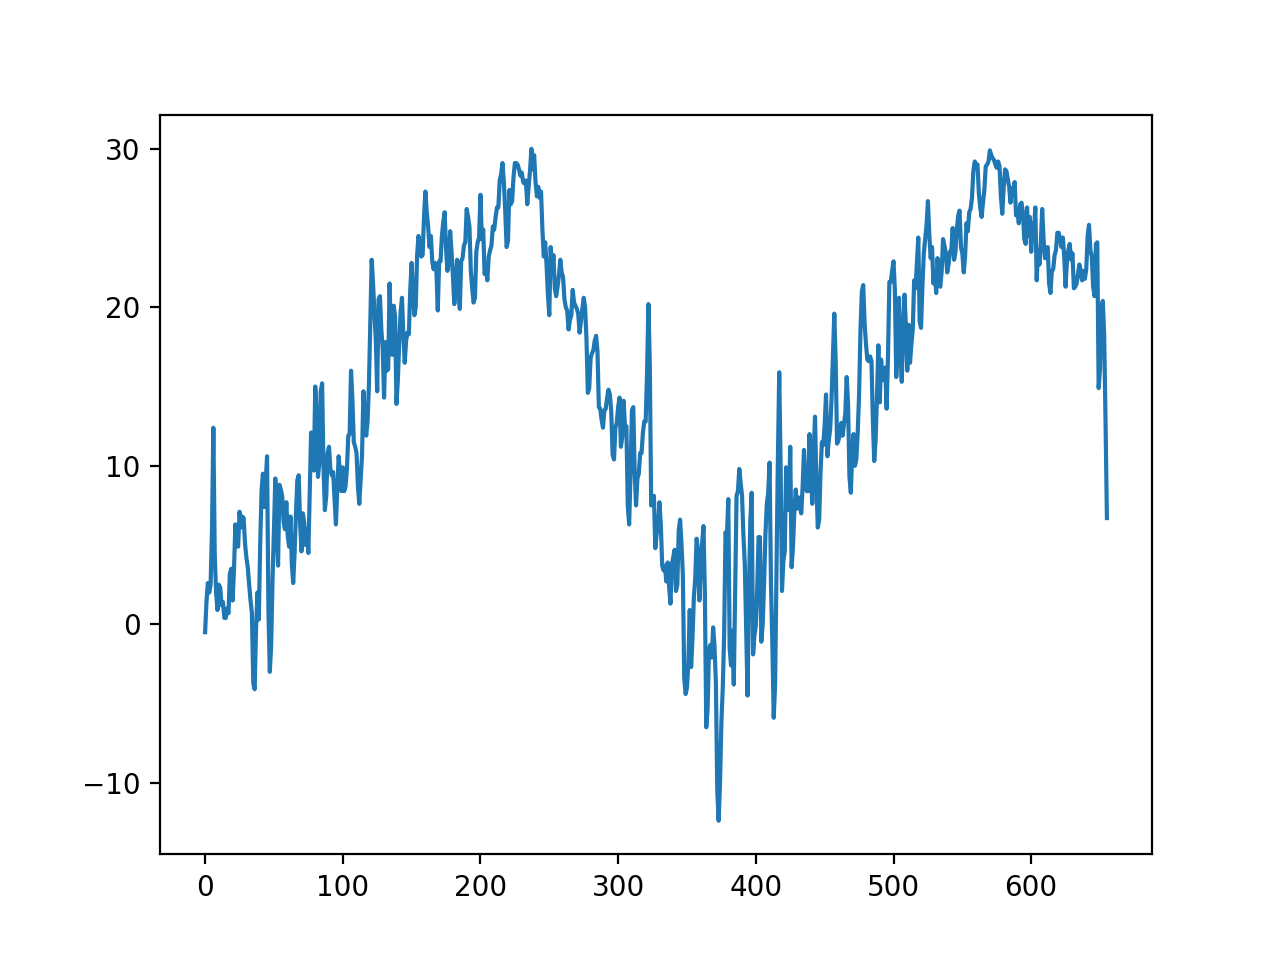

In [33]:
plt.plot(temp) # 이럴때는 ggplot 보다 matplotlib 이 훨씬 편함

## C. 숨은진짜상황1: 온도 $\to$ 아이스크림 판매량

`-` 아래와 같은 관계를 가정하자.

$$\text{아이스크림 판매량} = 20 + 2 \times \text{온도} + \text{오차}$$

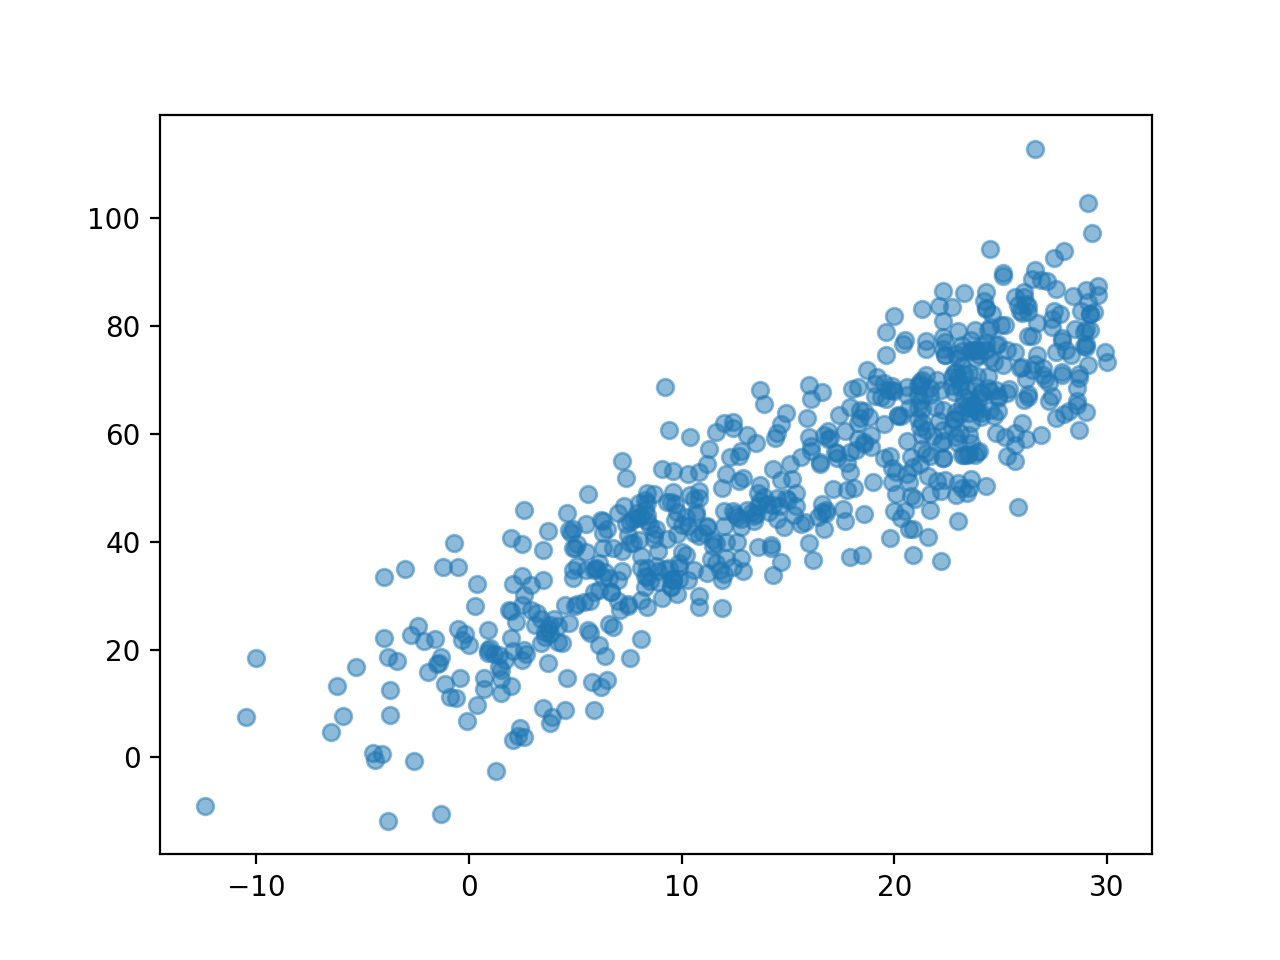

In [51]:
np.random.seed(1)
icecream_sales = 20 + 2 * temp + np.random.randn(len(temp))*10
plt.plot(temp,icecream_sales,'o',alpha=0.5) 

## D. 숨은진짜상황2: 온도 $\to$ 소아마비 반응수치

`-` 아래와 같은 관계를 가정하자.

$$\text{소아마비 반응수치} = 30 + 0.5 \times \text{온도} + \text{오차}$$

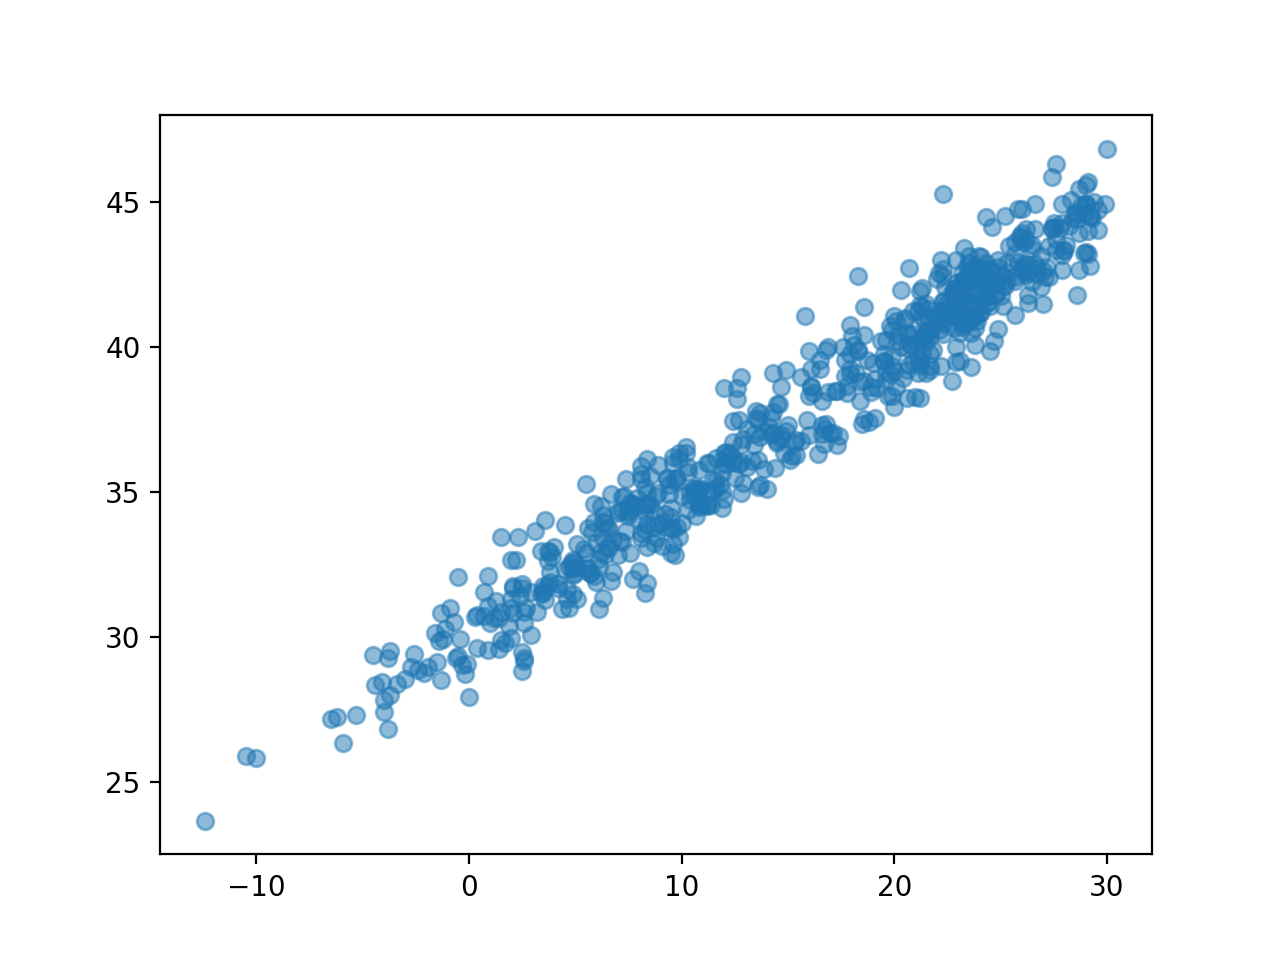

In [53]:
np.random.seed(2)
disease = 30 + 0.5 * temp + np.random.randn(len(temp))*1
plt.plot(temp, disease,'o',alpha=0.5) 

## E. 우리가 관측한 상황 (온도는 은닉되어 있음)

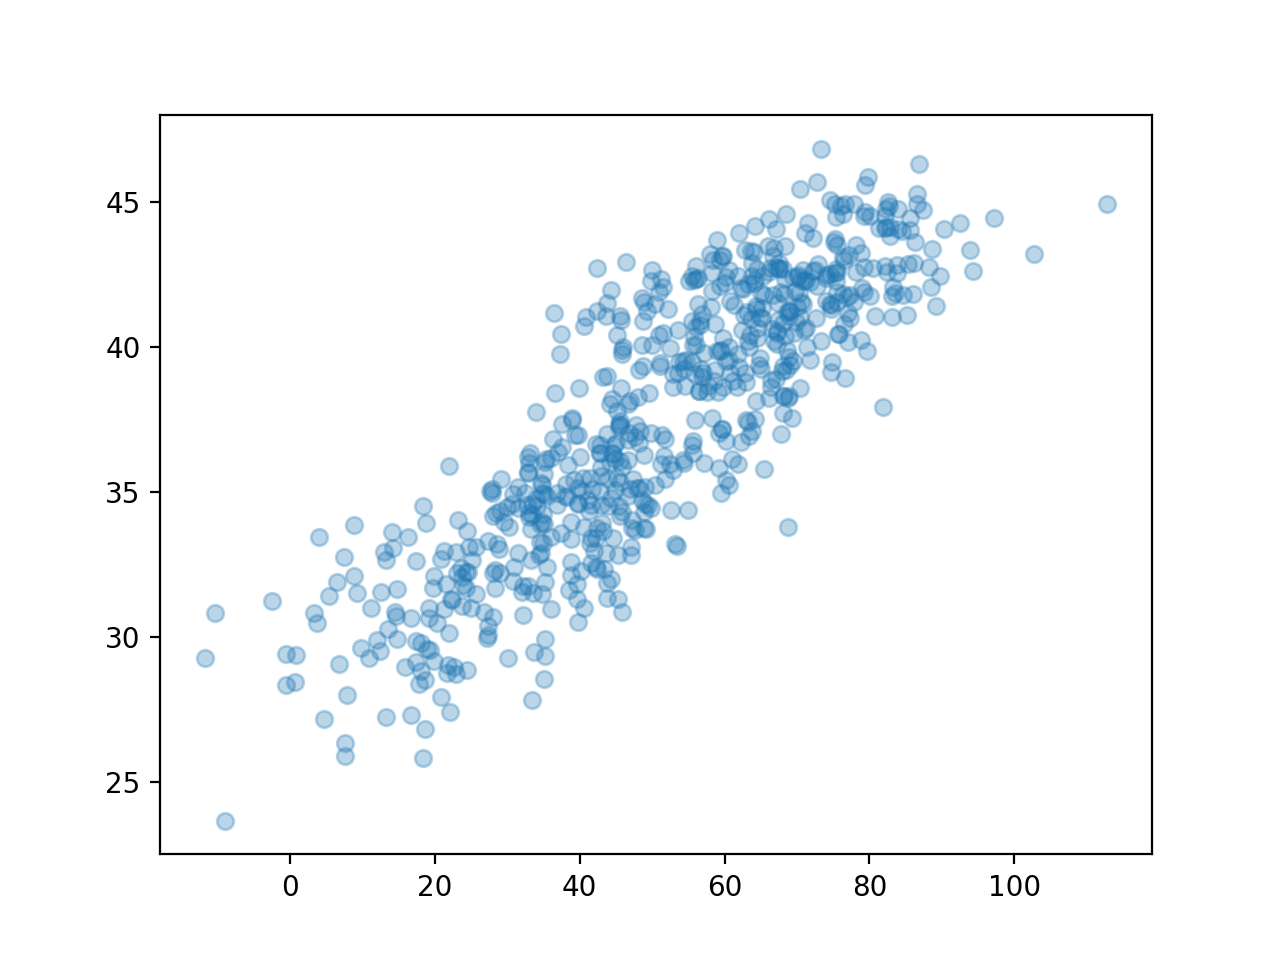

In [54]:
plt.plot(icecream_sales, disease, 'o', alpha=0.3)

## F. 여름만 뽑아서 플랏한다면?

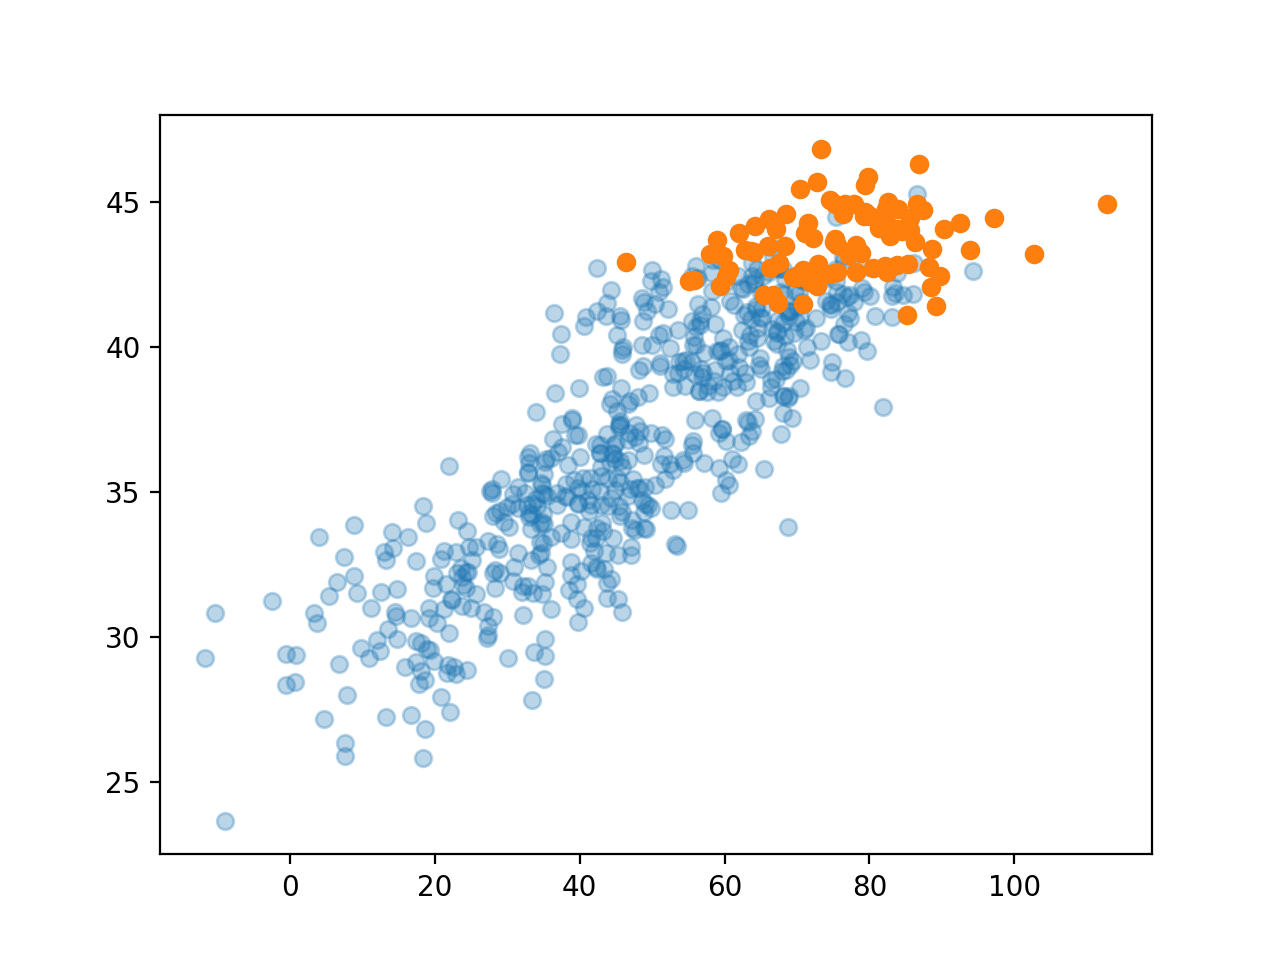

In [56]:
plt.plot(icecream_sales,disease,'o',alpha=0.3)
plt.plot(icecream_sales[temp>25], disease[temp>25],'o')

## G. `ggplot`으로 온도구간을 세분화 하여 시각화하자.

`-` 데이터를 데이터프레임으로

In [57]:
df = pd.DataFrame({'temp':temp, 'ice':icecream_sales, 'dis':disease})
df

`-` 구간별로 나눈변수를 추가

In [58]:
df.assign(temp_cut = pd.cut(df.temp,bins=5)) 

`-` 시각화

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence interva

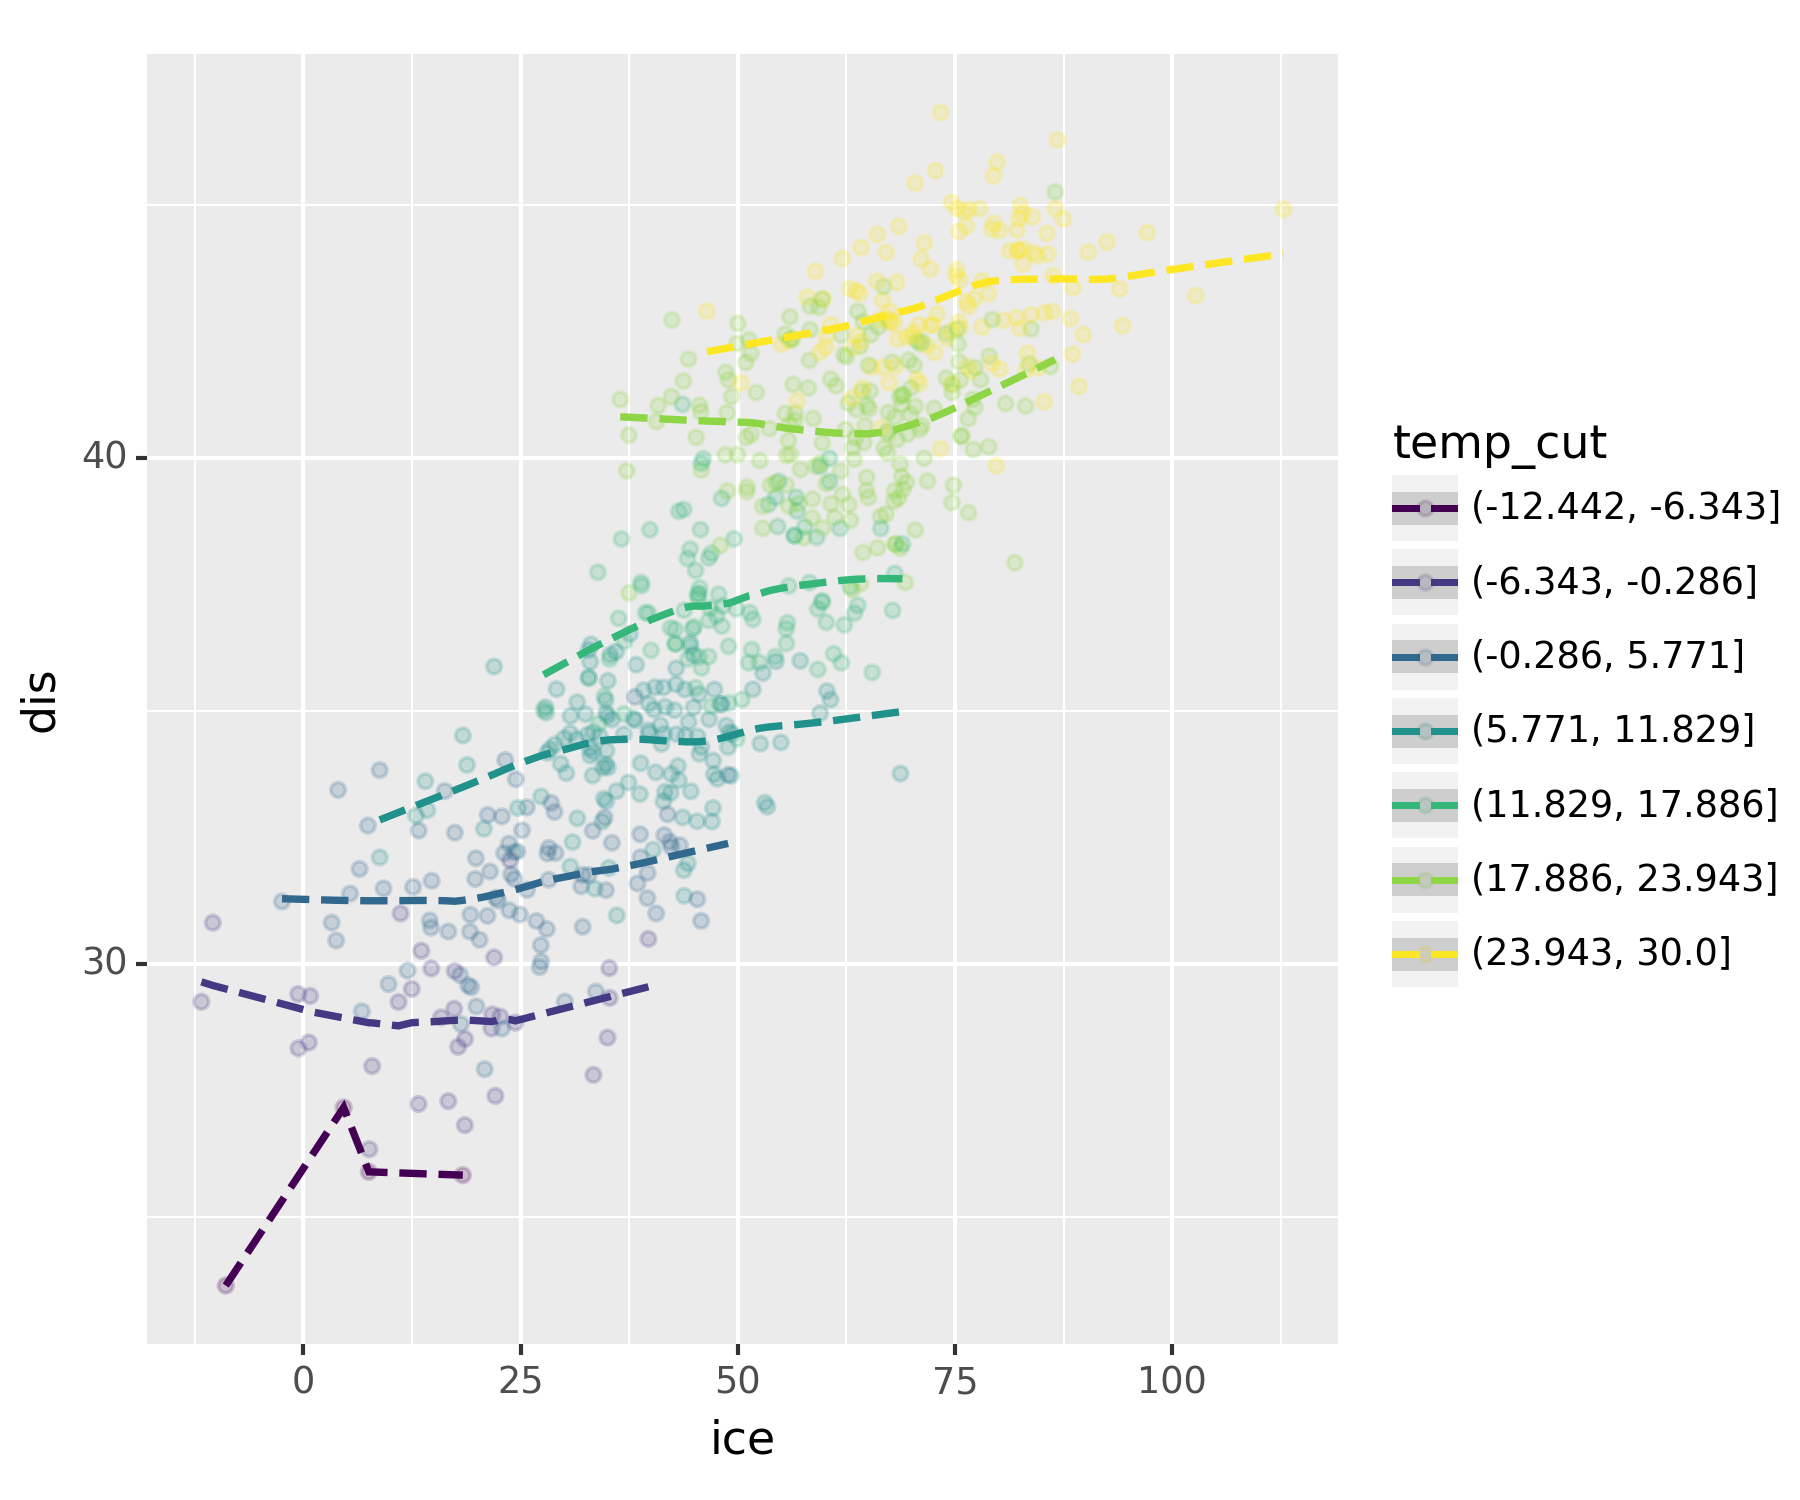

In [59]:
fig = ggplot(df.assign(temp_cut = pd.cut(df.temp,bins=7))) 
point = geom_point(aes(x='ice',y='dis',color='temp_cut'),alpha=0.2)
smooth = geom_smooth(aes(x='ice',y='dis',color='temp_cut'),linetype='dashed')
fig +point+ smooth

## H. 진짜 아이스크림을 먹고 배탈이 났다면?

`-` 온도는 아이스크림 판매에 여전히 영향을 주지만

$$\text{아이스크림 판매량} = 20 + 2 \times \text{온도} + \text{오차}$$

In [67]:
np.random.seed(1)
icecream_sales = 20 + 2 * temp + np.random.randn(len(temp))*10

`-` 수영장이 원인이 아니라 진짜 아이스크림을 먹고 소아마비에
걸린상황이라면?

$$\text{소아마비 반응수치} = 30 + 0.0 \times \text{온도} + 0.15 \times \text{아이스크림 판매량} + \text{오차}$$

In [68]:
np.random.seed(2) 
disease= 30+ 0*temp + 0.15*icecream_sales + np.random.randn(len(temp))*1

`-` 그림을 한번 그려보자.

In [69]:
df2 = pd.DataFrame({'temp':temp,'ice':icecream_sales,'dis':disease})
df2.assign(temp_cut=pd.cut(df2.temp,bins=7))

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence interva

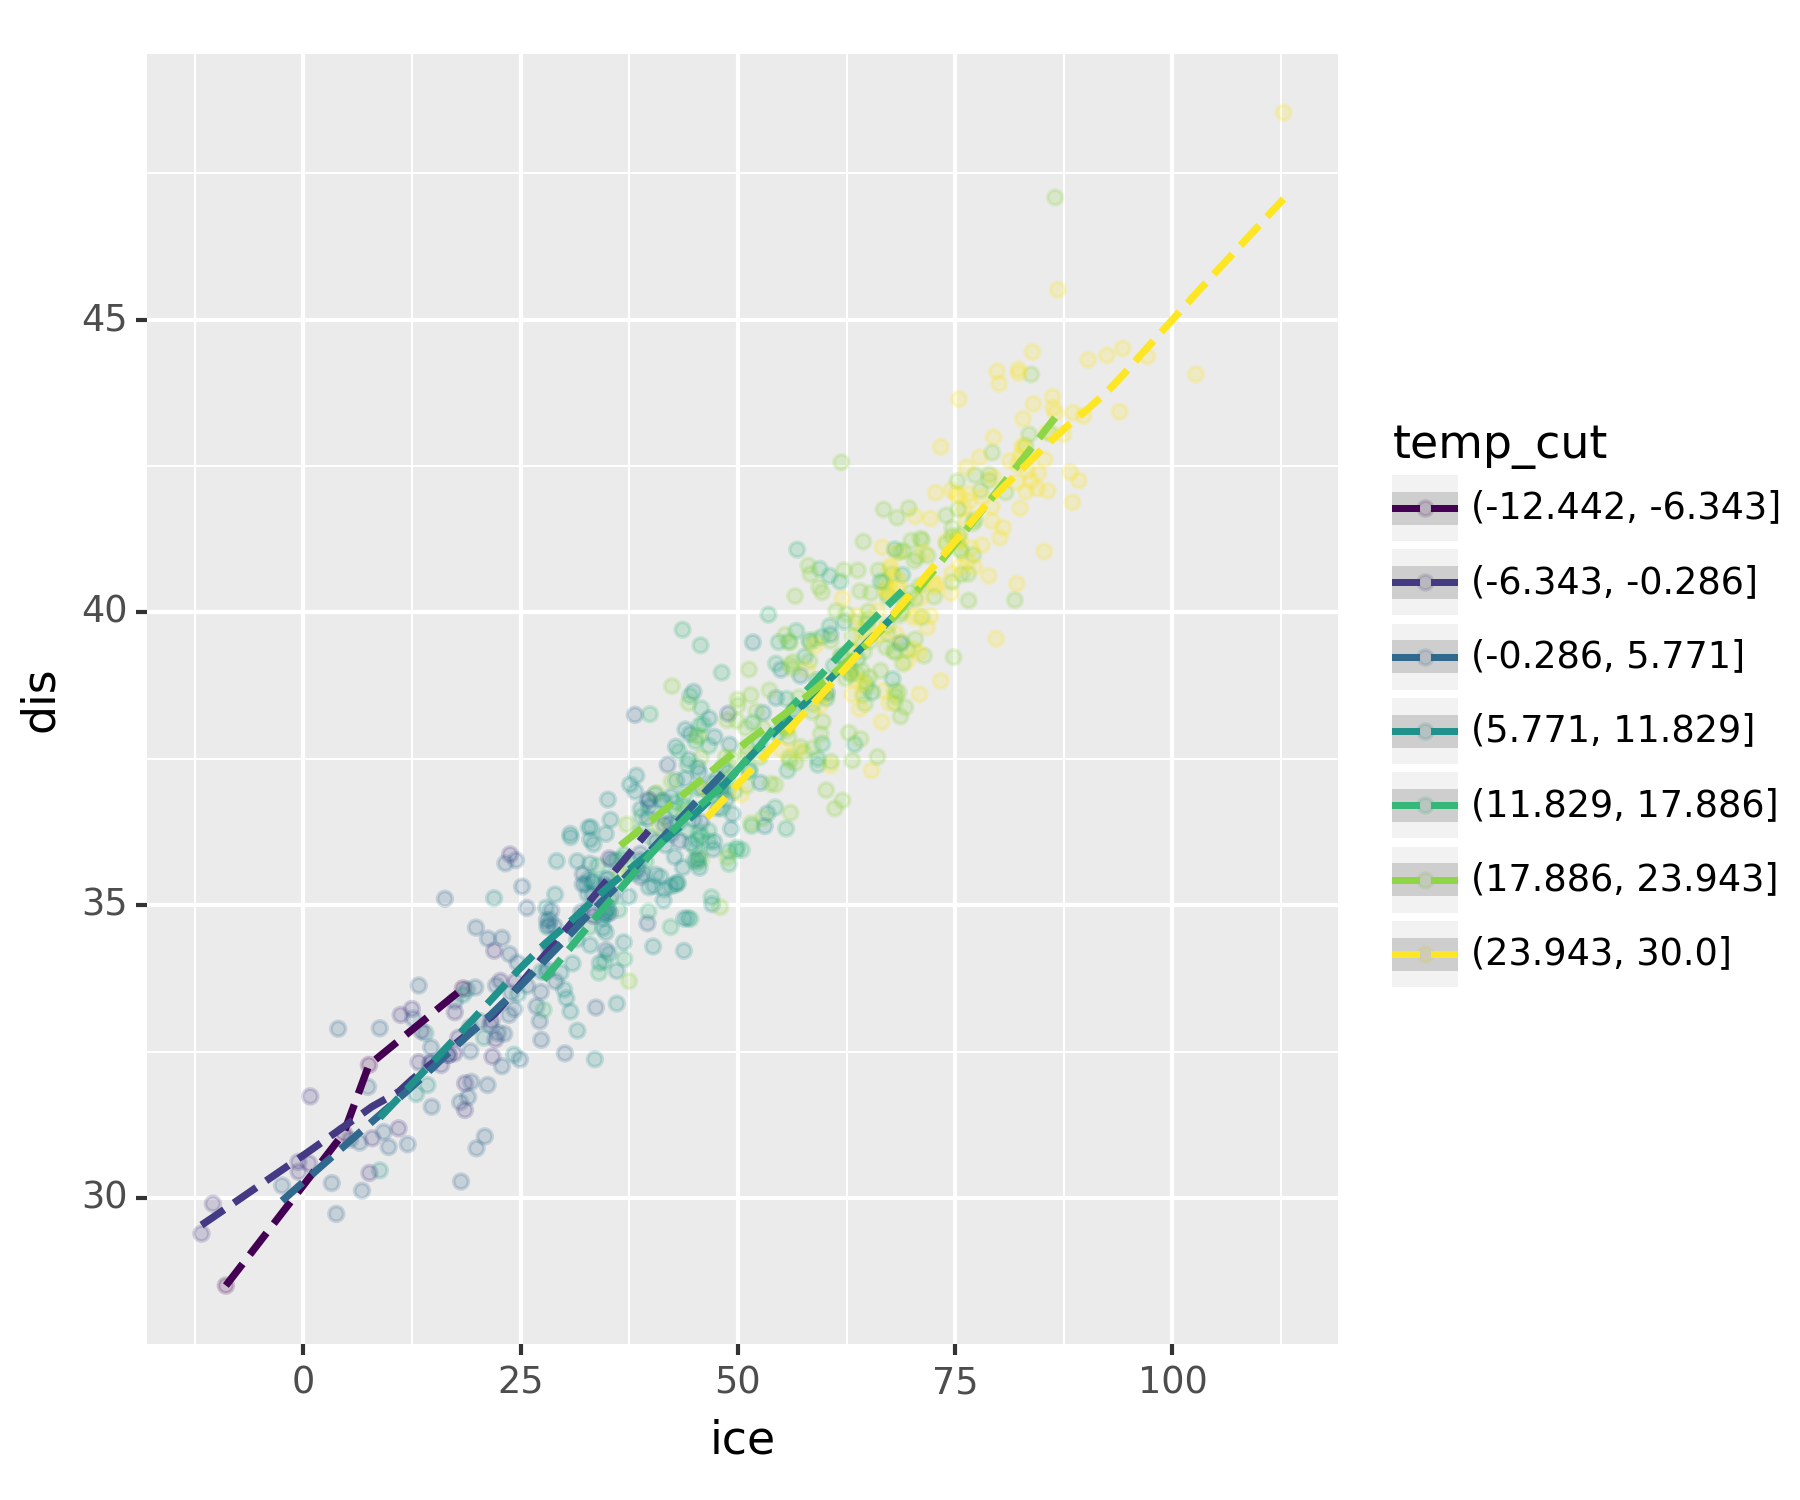

In [70]:
fig = ggplot(df2.assign(temp_cut = pd.cut(df2.temp,bins=7))) 
point = geom_point(aes(x='ice',y='dis',color='temp_cut'),alpha=0.2)
smooth = geom_smooth(aes(x='ice',y='dis',color='temp_cut'),linetype='dashed')
fig + point + smooth

## I. 해석

`-` 해피앤딩: 아이스크림 먹어도 소아마비 안걸려!

-   아이스크림을 먹으면 소아마비를 유발한다는 이상한 결론이 나올뻔 했음.
-   하지만 우리는 온도라는 흑막[1]을 잘 찾았고 결과적으로
    “온도-\>아이스크림판매량,소아마비” 이라는 합리적인 진리를 얻을 수
    있었다.

`-` 걱정: 또 다른 흑막?

-   고려할 흑막이 온도뿐이라는 보장이 어디있지?
-   사실 흑막2, 흑막3이 있어서 그런 흑막들을 고려하다보니까 아이스크림과
    소아마비사이의 상관관계가 다시 보인다면?

`-` 이론:

-   이론적으로는 “세상의 모든 은닉변수를 통제하였을 경우에도 corr(X,Y)의
    값이 1에 가깝다면 그때는 인과성이 있음” 이라고 주장할 수 있다.[2]
-   **즉 모든 흑막을 제거한다면 “상관성=인과성”이다.**

`-` 회의론:

-   세상의 모든 흑막을 제거하는건 사실상 불가능하지 않나?

`-` 두 가지 연구흐름

-   실험계획법: 실험계획을 잘하면 흑막을 제거한 효과가 있음.[3]
-   인과추론: 실험계획이 사실상 불가능한 경우가 있음 $\to$ 모인
    데이터에서 최대한 흑막2,3,4,.. 등이 비슷한 그룹끼리 “매칭”을 시킨다!

# 9. 숙제

`mpg`데이터를 이용하여 아래와 같은 그림을 그려라.

[1] 우리는 이것을 “은닉변수”라고 부르기로 했어요

[2] 물론 이 경우에도 무엇이 원인인지는 통계적으로 따지는 것은 불가

[3] 무작위로 사람뽑아서 담배를 피우게 한다든가

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/mpg.csv')

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.

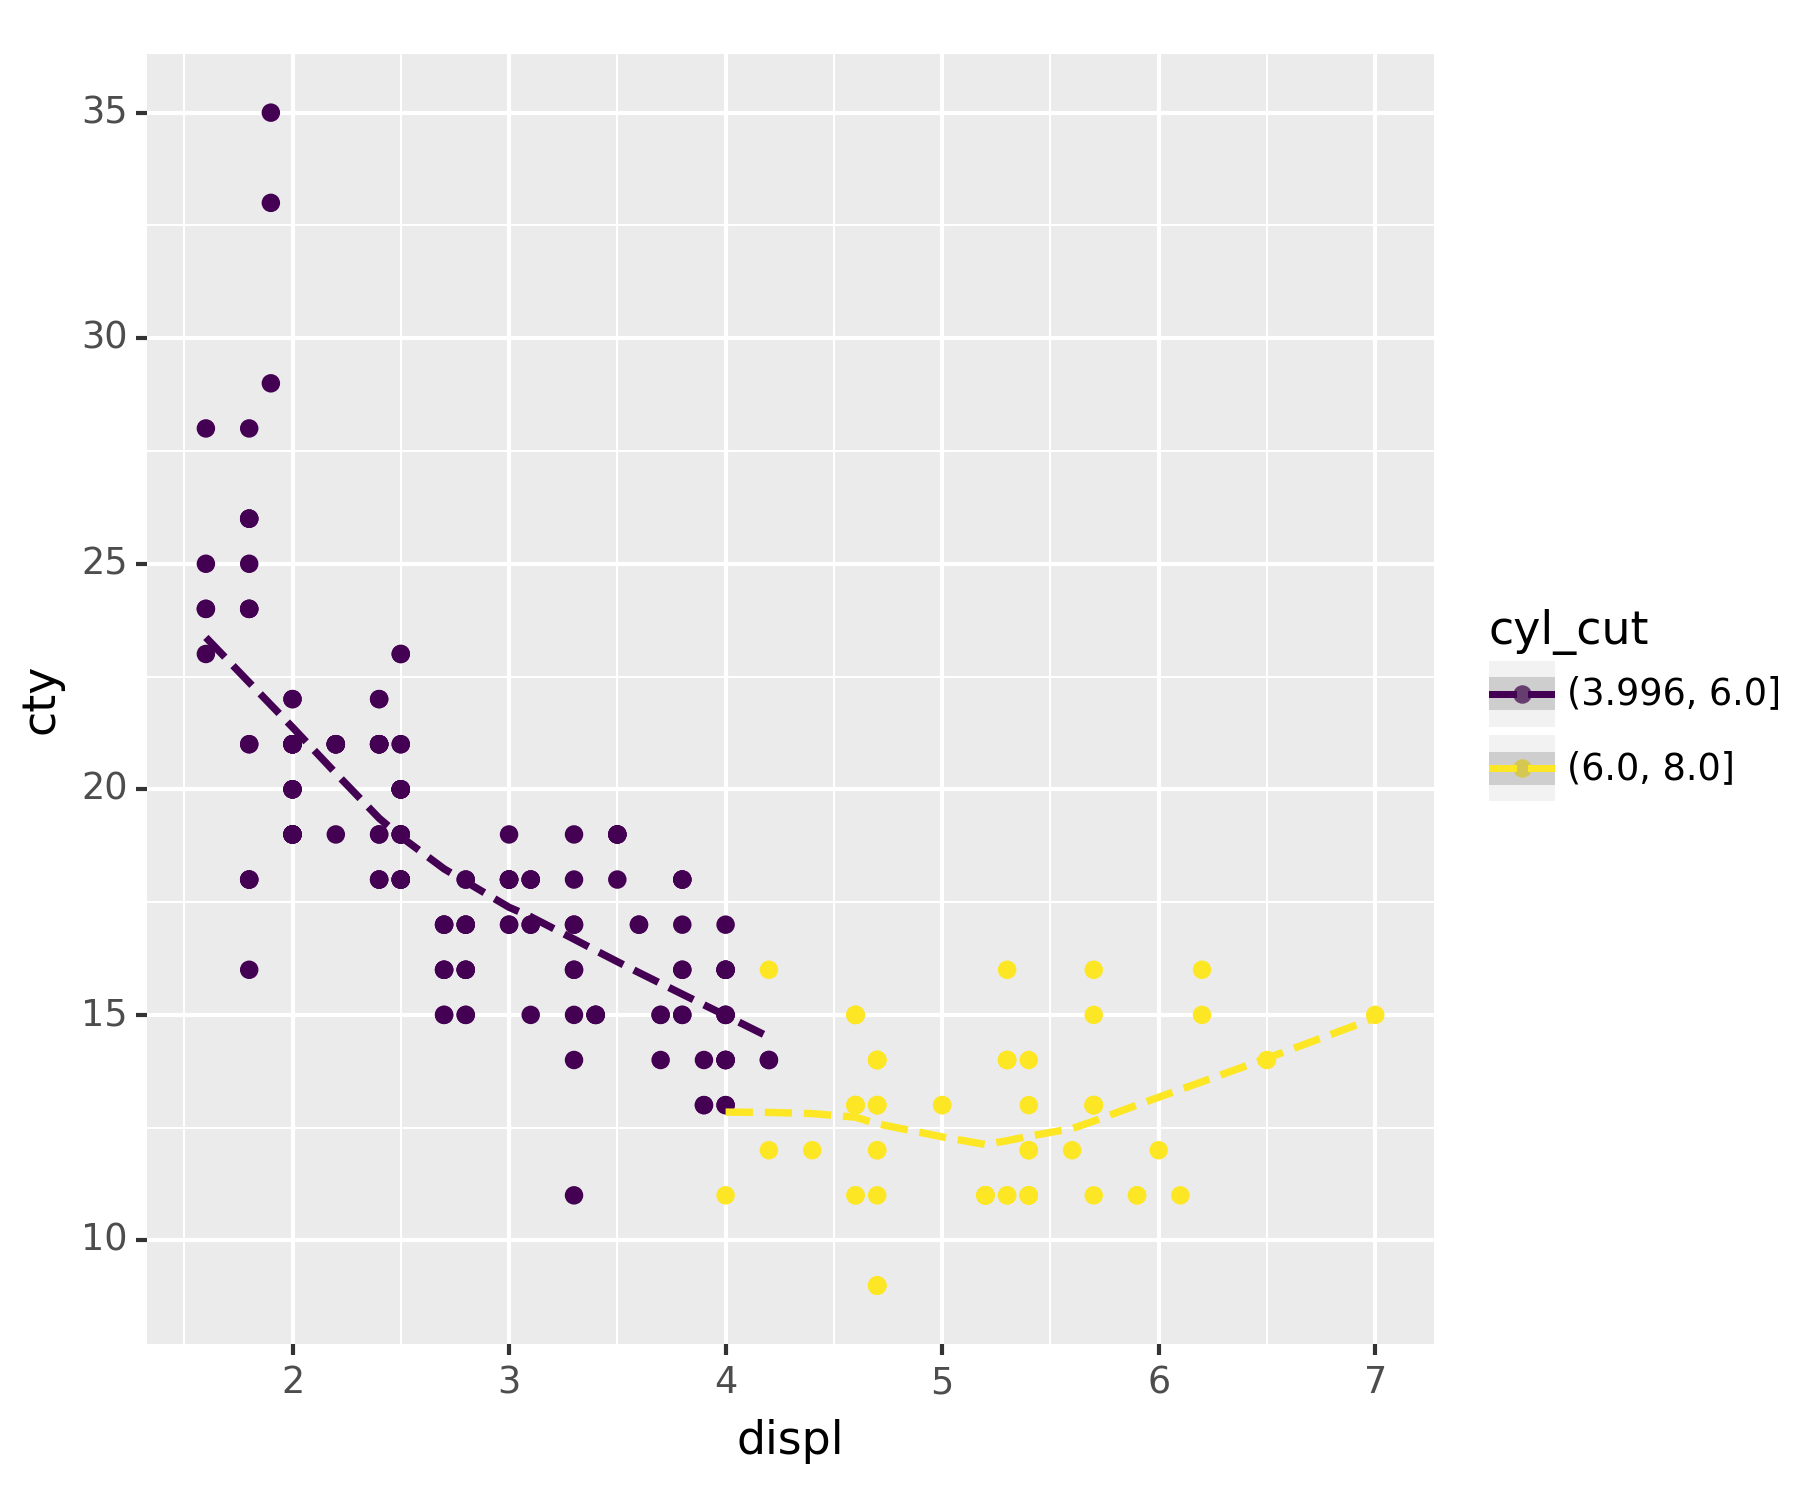

In [119]:
# 